In [35]:
import sys
print("python version: ", sys.version)

import pandas as pd
print("pandas version: ", pd.__version__)

import numpy as np
print('numpy version: ', np.__version__)

import scipy as sp
print('scipy version: ', sp.__version__)

import sklearn as skl
print('sklearn version: ', skl.__version__)

import matplotlib.pyplot as plt

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import keras as ks
print('keras version: ', ks.__version__)
print('keras backend: ', ks.backend.backend())

import tensorflow as tf
print('tensorflow version: ', tf.__version__)

import warnings
warnings.filterwarnings('ignore')

from keras import backend as K
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, precision_recall_curve

import random

python version:  3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]
pandas version:  0.24.2
numpy version:  1.16.4
scipy version:  1.3.0
sklearn version:  0.21.2
keras version:  2.2.4
keras backend:  tensorflow
tensorflow version:  1.14.0


In [36]:
def set_keras_backend(backend):
    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        reload(K)
        assert K.backend() == backend

set_keras_backend("tensorflow")

In [37]:
excel_file = r'geriomop-data-from-egems-paper-UPDATED-COL-FIX-ATC_2-and-behavior-change-022819.tsv'
df = pd.DataFrame(pd.read_csv(excel_file, sep='\t'))
print(df.shape)

(7584, 208)


# Missing value means not relevant
### One Hot Encoding (All zero stands for NA)
* "Mds-fall-2-6-months-to-admission", "Mds-fall-last-month-to-admission", "mds-pain-last-five-days" (Y/N/U/NA)
* "mds-long-term-memory-ok", "mds-short-term-memory-ok", "mds-staff-assess-pain", "mds-delirium-scale", "recent-start-other-fall-risk-rx" (Y/N/NA)
* "mds-pressure-ulcer-stage-X", (X=1, 2, 3, 4) (Y/NA)

### Label Encoding & Sin, Cos Transform (NA: (0, 0))
* "mds-cognitive-scale": 
  - 'Independent': 0, 
  - 'Modified Independence': 1, 
  - 'Moderately Impaired': 2, 
  - 'Severely Impaired': 3
* "mds-pain-freq-last-five-days": 
  - 'Continuous': 4, 
  - 'Frequent': 3, 
  - 'Occasional': 2, 
  - 'Rare': 1, 
  - 'Unable to respond': 0,
* "mds-pain-intensity": 
  - 'None': 0, 
  - 'Mild': 1, 
  - 'Moderate': 2, 
  - 'Severe': 3, 
  - 'Very severe, horrible': 4
* "Psychotropic-X": Number
* (Added) "Psychotropic-X-Period": Number


# Drop features

* ~~"Unnamed: 51"~~, 
* ~~"pk-interaction", "pk-interaction-type"~~ 
* ~~"object-drug-1", "object-drug-1-dose", "object-drug-1-effective-dose-increase", "object-drug-1-effective-dose", "interaction-1-stop-date"~~, 
* ~~"object-drug-2", "object-drug-2-dose", "object-drug-2-effective-dose-increase", "object-drug-2-effective-dose", "interaction-2-stop-date"~~
* "ws-sudden-stop", "ws-sudden-stop-drugs", "ws-prolonged-psychotropics", "mds-toilet-prgm-atmptd"
* "Blank-1", "Deleted-X" (X from 1 to 12), "Psychotropic-X-average-daily-dose", "Psychotropic-X-Start/End-date"
* "Entry-discharge-type"

# Encode features (originally) with no missing values

### Date-related Transform

* episodePeriod = episode-end-date - episode-start-date
* stayPeriod = stay-end-date - stay-start-date

### Drop Date-related Features

* "episode-start-date", "episode-end-date", "stay-start-date", "stay-end-date", "predictor-date", "projected-date"

### Binary Encoding (Y/N)

* "cms-long-stay", "mds-stay-trans-short-to-long",
* "mds-antianxiety-medication", "mds-antidepressant-medication", "mds-antipsychotic-medication", "mds-antibiotic-medication",
* "mds-anticoagulant-medication", "mds-diuretic-medication", "mds-hypnotic-medication",
* "mds-behavioral-symptoms", "mds-behavioral-symptoms-to-others", "mds-dehydrated", "mds-depression", "mds-fever",
* "mds-impaired-mobility", "mds-impaired-transfer", "mds-internal-bleeding", "mds-malnutrition", "mds-no-problem-conditions",
* "mds-vomiting", "mds-impaired-walk-in-room", "mds-impaired-walk-in-corridor", "mds-impaired-locomot-unit", "mds-impaired-locomot-other",
* "ws-antibiotic-anticoag-coexposure",
* "ws-psychotropic-with-not-ordered-weight-loss", "ws-diuretic-adl"

### One Hot Encoding

* "race", "facility", "gender", "mds-bims-summary-ranking", "ws-meclizine-psych-coexposure", 

### Drop Feature
* "PPS-assessment", "Federal-assessment"

### Mapping

* mds-pain-non-verbal {'None/Mild':0,'Moderate/Severe':1}

# Features need imputation
### One Hot Encoding

1. Binary categories (Yes/No/NA)
   * "pneumonia", "uti", "mdro", "anemia", "septicemia", "constipation", 
   * "wound", "hyponatremia", "hyperkalemia", "embolisms", 
   * "alzheimers", "anxiety", "depression", "non-alz-dimentia", 
   * "bipolar", "parkinsons", "psychosis", "schizophrenia", "seizure", "aphasia", "emphysema", 
   * "arthritis", "ashd", "bph", "cancer", "cerebralpalsy", "stroke", "cirrhosis", "comatose", 
   * "diabetes", "dysrhythmias", "gerd", "heart-failure", "hemiplegia/hemiparesis", "hepatitis", 
   * "huntingtons", "hyperlipidemia", "hyperthyroidism", "hypothyroidism", "hypertension", 
   * "hypotension", "multiple-sclerosis", "neurogenic-bladder", "obstructive-uropathy", 
   * "osteoporosis", "paraplegia", "ptsd", "pvd", "quadriplegia", "thyroid-disorder", 
   * "tourettes", "transient-ischemic-attack", "traumatic-brain-injury", "tuberculosis", "renal-failure", 

   * "mds-delirium-scale", "mds-pain-medication", "mds-received-pain-tx-non-pharm ", "mds-received-prn-pain-medication",
   * "mds-conduct-staff-assessment-mental-status", "mds-pressure-ulcer-prsnt", "conduct_bims", "acute_mental_change",
   * "conduct_pain_assmnt", "cane_or_crutch_past_7_days", "walker_past_7_days", "wheelchair_past_7_days", 
   * "limb_prosthesis_past_7_days", "no_listed_mobility_device", 


2. Other categories

   * "marital-status": 
     - "Never Married", "Married", "Widowed", "Separated", "Divorced"
   * "mds-entered-from": 
     - "Acute Hospital", "Psychiatric Hospital", "Another nursing home or swing bed", "Hospice", "Inpatient rehabilitation facility"
     - "Community (private home/apt., board/care, assisted living, group home)",  "Other", 
   * "mds-excess-weight-loss": 
     - "Yes - prescribed", "Yes - not prescribed", "No or unknown"
   * "balance_while_standing", "balance_while_walking", "balance_turning_around", "balance_toileting", "balance_bed_to_chair"
     - "Steady at all times", "able to stabilize without assistance", "able to stabilize with assistance", "Activity did not occur"
    
### Label Encoding
* "mds-urinary-incontinence"
  - "Always continent": 0, 
  - "Occasionally incontinent": 1,
  - "Frequently incontinent": 2,
  - "Always incontinent": 3,
  - "Catheter - not rated": (0, 0)


* "cam_inattention",
* "cam_disorganized_thought",
* "cam_altered_conc",
* "cam_motor_retardation"
  - "Behavior not present": 0,
  - "Behavior present, fluctuates": 1, 
  - "Behavior continuously present": 2, 

   
* "functlimit_rom_upper", 
* "functlimit_rom_lower"
   - "No impairment": 0, 
   - "Impairment on one side": 1, 
   - "Impairment on both sides": 2 


* "does_resident_wander"
   - "Behavior not exhibited": 0, 
   - "1 to 3 days": 1, 
   - "4 to 6 days": 2, 
   - "occurred daily": 3,

# Features from new dataset
* "atc_X" (X from 1 to 5) - drop in strategy 1
* "number_of_behavior_changes" - keep
* "min_effective_dose_X" - drop
* "psych_sdd_X" - drop in strategy 1

In [38]:
# drop feature
def drop_features(df, f):
    df.drop(f, axis=1, inplace=True)

In [39]:
# one hot encoding
def one_hot_encoding(df, features, categories):
    for f, c in zip(features, categories):
        df[f] = df[f].astype('category', categories=c)
    return pd.get_dummies(df, columns=features, prefix=features)

In [40]:
# compute date difference
def date_diff(start, end):
    return (pd.to_datetime(end) - pd.to_datetime(start)) / np.timedelta64(1, 'D')

In [41]:
# generate date diff features
def generate_period(df, f):
    for start, end, period in f:
        df[period] = date_diff(df[start], df[end])
        df.drop([start, end], axis=1, inplace=True)

In [42]:
# label encoding
def label_encoding(df, features, dictionaries):
    for f, dic in zip(features, dictionaries):
        df[f] = df[f].map(dic)

In [43]:
# sin&cos transform
def col_transform(df, col, mmax, mmin, df_ref=None):
    if(mmax <= mmin):
        # for test set, if max&min not set, use training set value
        if(df_ref is not None): 
            mmax = df_ref[col].max()
            mmin = df_ref[col].max()
        else:
            mmax = df[col].max()
            mmin = df[col].min()
    angle = 0.25 * np.pi * (df[col] - mmin) / (mmax - mmin) + 0.125 * np.pi
    return (np.cos(angle), np.sin(angle))

def df_transform(df, f, df_ref=None):
    for col, mmax, mmin in f:
        df[col + '_x'], df[col + '_y'] = col_transform(df, col, mmax, mmin, df_ref)
        df[col + '_x'].fillna(0, inplace=True)
        df[col + '_y'].fillna(0, inplace=True)
        df.drop(col, axis=1, inplace=True)

In [44]:
# train test split
from sklearn.model_selection import GroupShuffleSplit
def train_test_split(df, target, groupby, radio, random_state):
    train_idx, test_idx = next(GroupShuffleSplit(train_size=radio, test_size=1-radio, random_state=random_state).split(df, target, df[groupby]))
    return df.iloc[train_idx], df.iloc[test_idx], target.iloc[train_idx], target.iloc[test_idx]

In [45]:
# missing data describe
def missing_summary(df):
    missing_cnt = df.isna().sum()
    missing_data = pd.concat([missing_cnt, missing_cnt/df.shape[0]], axis=1, keys=['count', 'percentage'])
    return missing_data[missing_data['percentage'] != 0].sort_values(by='percentage', ascending=False)

In [46]:
# Drop features
f_drop = ["Blank-1", "ws-sudden-stop", "ws-sudden-stop-drugs", "ws-prolonged-psychotropics", "mds-toilet-prgm-atmptd"] + \
         ['Deleted-%d' % i for i in range(1, 13)] + ['Psychotropic-%d' % i for i in range(1, 6)] + \
         ['Psychotropic-%d-average-daily-dose' % i for i in range(1, 6)] + ["Entry-discharge-type"]

# Missing value means not relevant
f_one_hot = ["Mds-fall-2-6-months-to-admission", "Mds-fall-last-month-to-admission", "mds-pain-last-five-days", \
             "mds-delirium-scale", "mds-long-term-memory-ok", "mds-short-term-memory-ok", "mds-staff-assess-pain", \
             "recent-start-other-fall-risk-rx"] + ["mds-pressure-ulcer-stage-%d" % i for i in range(1, 5)]
cate_one_hot = [['Yes', 'No', 'Unable to answer']] * 3 + [['Yes', 'No']] * 9

f_period = [("Psychotropic-%d-Start-date" % i, 'Psychotropic-%d-End-date' % i, 'Psychotropic-%d-Period' % i) for i in range(1, 6)]

f_label = ['mds-cognitive-scale', 'mds-pain-freq-last-five-days', 'mds-pain-intensity']
dic_label = [{'Independent': 0, 'Modified Independence': 1, 'Moderately Impaired': 2, 'Severely Impaired': 3}, \
             {'Continuous': 4, 'Frequent': 3, 'Occasional': 2, 'Rare': 1, 'Unable to respond': 0}, \
             {'None': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3, 'Very severe, horrible': 4}]

f_transform = [('mds-cognitive-scale', 3, 0), ('mds-pain-freq-last-five-days', 4, 0), ('mds-pain-intensity', 4, 0)] + \
              [('Psychotropic-%d-Period' % i, 0, 0) for i in range(1, 6)]

In [47]:
# Encode features (originally) with no missing values
f_drop += ["predictor-date", "projected-date", "PPS-assessment", "Federal-assessment"]

f_period += [('episode-start-date', 'episode-end-date', 'episode-period'),\
             ('stay-start-date', 'stay-end-date', 'stay-period')]

f_label += ["cms-long-stay", "mds-stay-trans-short-to-long", "mds-antianxiety-medication", \
            "mds-antidepressant-medication", "mds-antipsychotic-medication", "mds-antibiotic-medication",
            "mds-anticoagulant-medication", "mds-diuretic-medication", \
            "mds-hypnotic-medication", "mds-behavioral-symptoms", "mds-behavioral-symptoms-to-others", \
            "mds-dehydrated", "mds-depression", "mds-fever", "mds-impaired-mobility", "mds-impaired-transfer", \
            "mds-internal-bleeding", "mds-malnutrition", "mds-no-problem-conditions", "mds-vomiting", \
            "mds-impaired-walk-in-room", "mds-impaired-walk-in-corridor", "mds-impaired-locomot-unit", \
            "mds-impaired-locomot-other", "ws-antibiotic-anticoag-coexposure", \
            "ws-psychotropic-with-not-ordered-weight-loss", \
            "ws-diuretic-adl", "ws-tramadol-antidepressant-coexposure"] + ["mds-pain-non-verbal"]
dic_label += [{'Yes': 1, 'No': 0}] * 28 + [{'None/Mild':0,'Moderate/Severe':1}]

f_one_hot += ["race", "facility", "gender", "mds-bims-summary-ranking", "ws-meclizine-psych-coexposure"]
cate_one_hot += [['White', 'Black', 'Other'], \
                 ['Sugar Creek', 'Heritage Place', 'Canterbury Place', 'Senaca Place', 'Cranberry Place'], \
                 ['Female', 'Male'], ['Intact or Moderately Intact', 'Moderate Impairment'], \
                 ['No', 'meclAndPsychStartSameR', 'meclPrecedesPsychR', 'psychPrecedesMeclR', 'meclAndPsychOlderStart']]

In [48]:
f_drop += ["min_effective_dose_%d" % i for i in range(1, 6)] + \
          ["Psychotropic-%d-average-daily-dose" % i for i in range(1, 6)] + \
          ["psych_sdd_%d" % i for i in range(1, 6)]

In [49]:
# generate target
target = df['outcome-Mds-fall-since-prior-assessment'].map({'None': 0, 'Yes': 1})
dff = df.drop(['outcome-mds-fall-no-injury', 'outcome-mds-fall-minor-injury', 'outcome-mds-fall-major-injury', \
               'outcome-Mds-fall-since-prior-assessment', 'outcome-riskmaster-fall-incident'], axis=1)

In [50]:
# in sdd 0 means NA
for i in range(1, 6):
    df.loc[df['psych_sdd_%d' % i] == 0, 'psych_sdd_%d' % i] = np.nan

In [51]:
X_train, X_test, y_train, y_test = train_test_split(dff, target, 'patient-id', 0.7, 0)
print('Total number of patients: %d' % len(df.groupby('patient-id')))
print('Number of patients in training set: %d' % len(X_train.groupby('patient-id')))

Total number of patients: 3133
Number of patients in training set: 2193


In [52]:
%%time
generate_period(X_train, f_period)
label_encoding(X_train, f_label, dic_label)
X_train_original = X_train.copy() # store value range
df_transform(X_train, f_transform)
X_train = one_hot_encoding(X_train, f_one_hot, cate_one_hot)
drop_features(X_train, f_drop)

CPU times: user 18.3 s, sys: 0 ns, total: 18.3 s
Wall time: 12.9 s


In [53]:
X_train_use = X_train.copy()

In [54]:
print(X_train.dtypes[X_train.dtypes == 'object'].index)

Index(['marital-status', 'mds-entered-from', 'mds-pain-medication',
       'mds-received-pain-tx-non-pharm', 'mds-received-prn-pain-medication',
       'mds-excess-weight-loss', 'mds-urinary-incontinence', 'pneumonia',
       'uti', 'mdro', 'anemia', 'septicemia', 'constipation', 'wound',
       'hyponatremia', 'hyperkalemia', 'embolisms', 'alzheimers', 'anxiety',
       'depression', 'non-alz-dimentia', 'bipolar', 'parkinsons', 'psychosis',
       'schizophrenia', 'seizure', 'aphasia', 'emphysema', 'arthritis', 'ashd',
       'bph', 'cancer', 'cerebralpalsy', 'stroke', 'cirrhosis', 'comatose',
       'diabetes', 'dysrhythmias', 'gerd', 'heart-failure',
       'hemiplegia/hemiparesis', 'hepatitis', 'huntingtons', 'hyperlipidemia',
       'hyperthyroidism', 'hypothyroidism', 'hypertension', 'hypotension',
       'multiple-sclerosis', 'neurogenic-bladder', 'obstructive-uropathy',
       'osteoporosis', 'paraplegia', 'ptsd', 'pvd', 'quadriplegia',
       'thyroid-disorder', 'tourettes', '

In [55]:
missing_summary(X_train_use)

,count,percentage
atc_5,5262,0.992643
atc_4,5142,0.970006
atc_3,4769,0.899642
atc_2,3775,0.712130
atc_1,2007,0.378608
mds-conduct-staff-assessment-mental-status,1115,0.210338
marital-status,331,0.062441
functlimit_rom_upper,329,0.062064
functlimit_rom_lower,325,0.061309
balance_bed_to_chair,320,0.060366


In [56]:
%%time
generate_period(X_test, f_period)
label_encoding(X_test, f_label, dic_label)
df_transform(X_test, f_transform, X_train_original)
X_test = one_hot_encoding(X_test, f_one_hot, cate_one_hot)
drop_features(X_test, f_drop)

CPU times: user 10.9 s, sys: 6.53 ms, total: 10.9 s
Wall time: 10.9 s


In [57]:
X_test_use = X_test.copy()

In [58]:
print(X_train.dtypes[X_train.dtypes == 'object'].index)

Index(['marital-status', 'mds-entered-from', 'mds-pain-medication',
       'mds-received-pain-tx-non-pharm', 'mds-received-prn-pain-medication',
       'mds-excess-weight-loss', 'mds-urinary-incontinence', 'pneumonia',
       'uti', 'mdro', 'anemia', 'septicemia', 'constipation', 'wound',
       'hyponatremia', 'hyperkalemia', 'embolisms', 'alzheimers', 'anxiety',
       'depression', 'non-alz-dimentia', 'bipolar', 'parkinsons', 'psychosis',
       'schizophrenia', 'seizure', 'aphasia', 'emphysema', 'arthritis', 'ashd',
       'bph', 'cancer', 'cerebralpalsy', 'stroke', 'cirrhosis', 'comatose',
       'diabetes', 'dysrhythmias', 'gerd', 'heart-failure',
       'hemiplegia/hemiparesis', 'hepatitis', 'huntingtons', 'hyperlipidemia',
       'hyperthyroidism', 'hypothyroidism', 'hypertension', 'hypotension',
       'multiple-sclerosis', 'neurogenic-bladder', 'obstructive-uropathy',
       'osteoporosis', 'paraplegia', 'ptsd', 'pvd', 'quadriplegia',
       'thyroid-disorder', 'tourettes', '

In [59]:
missing_summary(X_test_use)

,count,percentage
atc_5,2271,0.994744
atc_4,2223,0.973719
atc_3,2039,0.893123
atc_2,1607,0.703898
atc_1,874,0.382830
mds-conduct-staff-assessment-mental-status,436,0.190977
marital-status,150,0.065703
functlimit_rom_lower,125,0.054753
functlimit_rom_upper,125,0.054753
balance_bed_to_chair,115,0.050372


In [60]:
X_train_use.shape

(5301, 189)

In [61]:
X_test_use.shape

(2283, 189)

# Experiment: Use non-missing values to train model
### Prepare Test Set Features


In [62]:
idx = missing_summary(X_train_use).index.tolist()
X_train_use.drop(columns=idx, axis=1, inplace=True)
X_test_use.drop(columns=idx, axis=1, inplace=True)

In [63]:
X_train_use.shape

(5301, 100)

In [64]:
X_test_use.shape

(2283, 100)

### RNN

In [65]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout, Masking, TimeDistributed
from numpy.random import seed
from tensorflow import set_random_seed
from copy import deepcopy
from keras.preprocessing.sequence import pad_sequences

In [66]:
def scaler_transform(X_train_use, X_test_use):    
    scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train_use.drop('patient-id', axis=1))
    X_train_transformed = pd.DataFrame(scaler.transform(X_train_use.drop('patient-id', axis=1)), \
                                       columns=X_train_use.columns[1:], index=X_train_use.index)                                   
    X_train_transformed['patient-id'] = X_train_use['patient-id']
    X_test_transformed = pd.DataFrame(scaler.transform(X_test_use.drop('patient-id', axis=1)), \
                                       columns=X_test_use.columns[1:], index=X_test_use.index) 
    X_test_transformed['patient-id'] = X_test_use['patient-id']
    return X_train_transformed, X_test_transformed

In [67]:
def generate_nested_list_old(X, Y):
    X = X.copy()
    Y = Y.copy()
    x_list, y_list = [], [] 
    x1, x2 = [], []
    pids = X['patient-id'].unique()
    for pid in pids:
        df = Y[X[X['patient-id']==pid].index]
        if(df.shape[0] == 1):
            x1.append(pd.Series([0]))
            x2.append(pd.Series([0]))
        else:
            # input 1=(1, 0), 0=(0, 1), NA=(0, 0)
            x1.append(pd.Series([0]))
            x1.append(df[:-1])
            x2.append(pd.Series([0]))
            x2.append(df[:-1].map({0: 1, 1: 0}))
    X['input_outcome_x'] = pd.Series(pd.concat(x1, ignore_index=True).tolist(), index=X.index)
    X['input_outcome_y'] = pd.Series(pd.concat(x2, ignore_index=True).tolist(), index=X.index)
    for pid in pids:
        df = X[X['patient-id']==pid]
        y_list.append(Y[df.index].values)
        x_list.append([record for record in df.drop('patient-id', axis=1).values])
    return x_list, y_list

In [68]:
def add_previous_outcome(X, Y):
    X = X.copy()
    x1, x2 = [], []
    pids = X['patient-id'].unique()
    for pid in pids:
        df = Y[X[X['patient-id']==pid].index]
        if(df.shape[0] == 1):
            x1.append(pd.Series([0]))
            x2.append(pd.Series([0]))
        else:
            # input 1=(1, 0), 0=(0, 1), NA=(0, 0)
            x1.append(pd.Series([0]))
            x1.append(df[:-1])
            x2.append(pd.Series([0]))
            x2.append(df[:-1].map({0: 1, 1: 0}))
    X['input_outcome_x'] = pd.Series(pd.concat(x1, ignore_index=True).tolist(), index=X.index)
    X['input_outcome_y'] = pd.Series(pd.concat(x2, ignore_index=True).tolist(), index=X.index)
    return X

In [69]:
X_train_use = add_previous_outcome(X_train_use, y_train)
X_test_use = add_previous_outcome(X_test_use, y_test)
# print(X_train_use.shape)
X_train_transformed, X_test_transformed = scaler_transform(X_train_use, X_test_use)

In [70]:
def generate_nested_list(X, Y):
    x_list, y_list = [], [] 
    pids = X['patient-id'].unique()
    for pid in pids:
        df = X[X['patient-id']==pid]
        y_list.append(Y[df.index].values)
        x_list.append([record for record in df.drop('patient-id', axis=1).values])
    return x_list, y_list

In [71]:
def mygenerator(x_list, y_list=None):
    if(y_list is not None):
        while True:
            for x, y in zip(x_list, y_list):
                yield np.array(x).reshape((len(x), 1, x[0].shape[0])), y
    else:
        while True:
            for x in x_list:
                yield np.array(x).reshape((len(x), 1, x[0].shape[0])) 

In [72]:
def fit_model_old(model, epoch, X_train, y_train, X_valid=None, y_valid=None, verbose=0):
    if(verbose == 0):
        model.fit_generator(mygenerator(X_train, y_train), steps_per_epoch=len(X_train), epochs=epoch, verbose=0)
    else:
        history = model.fit_generator(mygenerator(X_train, y_train), steps_per_epoch=len(X_train), \
                                      validation_data=mygenerator(X_valid, y_valid), validation_steps=len(X_valid), \
                                      epochs=epoch, verbose=verbose)
        plot_history(history)
    return history

In [73]:
def fit_model(model, epoch, X_train, y_train, X_valid=None, y_valid=None, verbose=0):
    history = model.fit(X_train, y_train, epochs=epoch, verbose=verbose)
    if(verbose != 0):
        plot_history(history)
    return history

In [74]:
def plot_roc_curve(fpr, tpr):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

In [75]:
def plot_history(history, loss=None, val_loss=None):
    if(history is not None):
        loss = history.history['loss']
    plt.figure()
    plt.plot(loss)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    if('val_loss' in history.history):
        val_loss = history.history['val_loss']
        plt.plot(val_loss)
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

In [76]:
from sklearn.model_selection import GroupKFold
def kfold_validation_old(unit, ratio, epoch, X, y, groupby, k=5, verbose=0):
    auroc_list = []
    for train_idx, valid_idx in GroupKFold(n_splits=5).split(X, y, X[groupby]):
        X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y.iloc[train_idx], y.iloc[valid_idx]
        X_train, y_train = generate_nested_list(X_train, y_train)
        X_valid, y_valid = generate_nested_list(X_valid, y_valid)
        seed(1)
        set_random_seed(2)
        model = build_model(unit, ratio, 1, X_train[0][0].shape[0])
        if (verbose == 0):
            fit_model(model, epoch, X_train, y_train)
        else:
            fit_model(model, epoch, X_train, y_train, X_valid, y_valid, verbose)
        y_predict = model.predict_generator(mygenerator(X_valid), steps=len(X_valid))
        y_predict = np.concatenate(y_predict)
        y_true = np.concatenate(y_valid)
        auroc_list.append(auroc(y_predict, y_true))
    return auroc_list 

In [77]:
def auroc(y_predict, y_true, plot=False):
    fpr, tpr, thresholds = roc_curve(y_true, y_predict, pos_label=1)    
    if(plot):
        plot_roc_curve(fpr, tpr)
    return auc(fpr, tpr)

In [78]:
def find_best_f1(y_predict, y_true):
    fpr, tpr, thresholds = roc_curve(y_true, y_predict, pos_label=1) 
    max_f1, th = 0, 0
    for threshold in thresholds:
        f1 = f1_score(y_true, y_predict > threshold)
        if(f1 > max_f1):
            max_f1 = f1
            th = threshold
    return max_f1, th

In [79]:
def other_metrics(y_predict, y_true, threshold):
    y_threshold = y_predict > threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_threshold).ravel()
    return precision_score(y_true, y_threshold), recall_score(y_true, y_threshold),\
            accuracy_score(y_true, y_threshold), float(tn) / (tn + fp)

In [80]:
from sklearn.model_selection import GroupKFold
def kfold_validation(unit, ratio, epoch, X, y, groupby, k=5, verbose=0, max_timestamps=20, n_features=101):
    auroc_list = []
    other_metric_list = []
    for train_idx, valid_idx in GroupKFold(n_splits=5).split(X, y, X[groupby]):
        X_train, X_valid, y_train, y_valid = X.iloc[train_idx], X.iloc[valid_idx], y.iloc[train_idx], y.iloc[valid_idx]
        X_train, y_train = generate_nested_list(X_train, y_train)
        X_valid, y_valid = generate_nested_list(X_valid, y_valid)
        X_train_pad, y_train_pad, X_valid_pad, y_valid_pad = pad_all(X_train, y_train, X_valid, y_valid, max_timestamps)
        y_train_pad = y_train_pad.reshape(y_train_pad.shape[0], y_train_pad.shape[1], 1)
        seed(1)
        set_random_seed(2)
        model = build_model(unit, ratio, max_timestamps, n_features)
        fit_model(model, epoch, X_train_pad, y_train_pad, verbose=verbose)
        y_valid_len = [len(y) for y in y_valid]
        y_predict = model.predict(X_valid_pad)
        y_predict = truncate_prediction(y_predict, y_valid_len)
        y_true = np.concatenate(y_valid)
        auroc_list.append(auroc(y_predict, y_true))
        f1, th = find_best_f1(y_predict, y_true)
        precision, recall, accuracy, specificity = other_metrics(y_predict, y_true, th)
        other_metric_list.append((precision, recall, accuracy, specificity,f1,th))
    return (auroc_list, other_metric_list) 

In [81]:
# %%time
# shape: (num_of_patients, num_of_records, num_of_features)
X_train_list, y_train_list = generate_nested_list(X_train_transformed, y_train)
X_test_list, y_test_list = generate_nested_list(X_test_transformed, y_test)

In [82]:
# %%time
# shape: (num_of_patients, num_of_records, num_of_features)
X_train_list2, y_train_list2 = generate_nested_list_old(X_train_transformed, y_train)
X_test_list2, y_test_list2 = generate_nested_list_old(X_test_transformed, y_test)

In [83]:
max_timestamps = df.groupby(['patient-id']).size().max()
print(max_timestamps)

19


In [90]:
n_features = X_train_list[0][0].shape[0]
print(n_features)

101


In [85]:
n_features2 = X_train_list2[0][0].shape[0]

In [86]:
type(X_train_list[0][0][0])

numpy.float64

In [87]:
def pad_data(X, maxlen):
    return pad_sequences(X, maxlen=maxlen, dtype='float64', padding='post')

def pad_all(X_train, y_train, X_test, y_test, maxlen):
    return pad_data(X_train, maxlen), pad_data(y_train, maxlen), pad_data(X_test, maxlen), pad_data(y_test, maxlen)

In [88]:
from keras import regularizers
from keras.optimizers import Adagrad, Adadelta
def build_model(cell_size, dropout_ratio, n_timesteps, n_dimensions):
    model = Sequential()
    model.add(Masking(input_shape=(n_timesteps, n_dimensions)))
    model.add(LSTM(cell_size, return_sequences=True, recurrent_dropout=dropout_ratio, dropout=0.5))
    model.add(TimeDistributed(Dense(1, activation='sigmoid')))
    model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['binary_accuracy'])
    return model

In [89]:
def truncate_prediction(y_, y_len):
    y_concat = []
    for i, y in enumerate(y_):
        y_concat.append(np.concatenate(y[:y_len[i], :]))
    y_concat = np.concatenate(y_concat)
    return y_concat

W0422 15:53:15.864529 140691507341120 deprecation_wrapper.py:119] From /usr/local/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0422 15:53:15.867664 140691507341120 deprecation_wrapper.py:119] From /usr/local/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0422 15:53:15.882834 140691507341120 deprecation_wrapper.py:119] From /usr/local/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0422 15:53:16.004302 140691507341120 deprecation_wrapper.py:119] From /usr/local/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_

Epoch 1/225
1755/1755 [==============================] - 4s 2ms/step - loss: 0.4881 - binary_accuracy: 0.8108
Epoch 2/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4533 - binary_accuracy: 0.8214
Epoch 3/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4470 - binary_accuracy: 0.8201
Epoch 4/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4368 - binary_accuracy: 0.8251
Epoch 5/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4391 - binary_accuracy: 0.8215
Epoch 6/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4310 - binary_accuracy: 0.8237
Epoch 7/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4336 - binary_accuracy: 0.8243
Epoch 8/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4272 - binary_accuracy: 0.8248
Epoch 9/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4306 - binary_accuracy: 0.8220
Epoch 10/2

1755/1755 [==============================] - 2s 1ms/step - loss: 0.4135 - binary_accuracy: 0.8261
Epoch 75/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4100 - binary_accuracy: 0.8262
Epoch 76/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4093 - binary_accuracy: 0.8335
Epoch 77/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4139 - binary_accuracy: 0.8280
Epoch 78/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4077 - binary_accuracy: 0.8297
Epoch 79/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4129 - binary_accuracy: 0.8256
Epoch 80/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4100 - binary_accuracy: 0.8294
Epoch 81/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4038 - binary_accuracy: 0.8318
Epoch 82/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4051 - binary_accuracy: 0.8329
Epoch 83/225
1

1755/1755 [==============================] - 2s 1ms/step - loss: 0.4084 - binary_accuracy: 0.8261
Epoch 148/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4008 - binary_accuracy: 0.8335
Epoch 149/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4060 - binary_accuracy: 0.8332
Epoch 150/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4080 - binary_accuracy: 0.8307
Epoch 151/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.3998 - binary_accuracy: 0.8347
Epoch 152/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4091 - binary_accuracy: 0.8271
Epoch 153/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4044 - binary_accuracy: 0.8339
Epoch 154/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4021 - binary_accuracy: 0.8348
Epoch 155/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4079 - binary_accuracy: 0.8303
Epoch 

1755/1755 [==============================] - 2s 1ms/step - loss: 0.3978 - binary_accuracy: 0.8357
Epoch 221/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.3983 - binary_accuracy: 0.8317
Epoch 222/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.3975 - binary_accuracy: 0.8348
Epoch 223/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.3955 - binary_accuracy: 0.8306
Epoch 224/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4070 - binary_accuracy: 0.8307
Epoch 225/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4014 - binary_accuracy: 0.8312


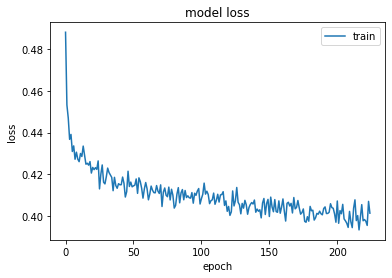

Epoch 1/225
1755/1755 [==============================] - 3s 2ms/step - loss: 0.4854 - binary_accuracy: 0.8157
Epoch 2/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4519 - binary_accuracy: 0.8244
Epoch 3/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4416 - binary_accuracy: 0.8245
Epoch 4/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4407 - binary_accuracy: 0.8229
Epoch 5/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4387 - binary_accuracy: 0.8228
Epoch 6/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4317 - binary_accuracy: 0.8259
Epoch 7/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4347 - binary_accuracy: 0.8225
Epoch 8/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4286 - binary_accuracy: 0.8281
Epoch 9/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4334 - binary_accuracy: 0.8224
Epoch 10/2

1755/1755 [==============================] - 2s 1ms/step - loss: 0.4090 - binary_accuracy: 0.8340
Epoch 75/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4092 - binary_accuracy: 0.8287
Epoch 76/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4081 - binary_accuracy: 0.8313
Epoch 77/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4115 - binary_accuracy: 0.8316
Epoch 78/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4104 - binary_accuracy: 0.8321
Epoch 79/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4062 - binary_accuracy: 0.8316
Epoch 80/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4080 - binary_accuracy: 0.8368
Epoch 81/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4097 - binary_accuracy: 0.8341
Epoch 82/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4134 - binary_accuracy: 0.8313
Epoch 83/225
1

1755/1755 [==============================] - 2s 1ms/step - loss: 0.4052 - binary_accuracy: 0.8305
Epoch 148/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.3982 - binary_accuracy: 0.8366
Epoch 149/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4112 - binary_accuracy: 0.8262
Epoch 150/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4079 - binary_accuracy: 0.8269
Epoch 151/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4049 - binary_accuracy: 0.8360
Epoch 152/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.3962 - binary_accuracy: 0.8401
Epoch 153/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4041 - binary_accuracy: 0.8337
Epoch 154/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4124 - binary_accuracy: 0.8300
Epoch 155/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4013 - binary_accuracy: 0.8366
Epoch 

1755/1755 [==============================] - 2s 1ms/step - loss: 0.4026 - binary_accuracy: 0.8339
Epoch 221/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4043 - binary_accuracy: 0.8348
Epoch 222/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.3953 - binary_accuracy: 0.8380
Epoch 223/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4055 - binary_accuracy: 0.8316
Epoch 224/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4005 - binary_accuracy: 0.8337
Epoch 225/225
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4017 - binary_accuracy: 0.8373


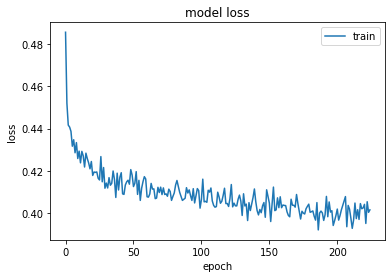

Epoch 1/225
1754/1754 [==============================] - 3s 2ms/step - loss: 0.4867 - binary_accuracy: 0.8130
Epoch 2/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4508 - binary_accuracy: 0.8218
Epoch 3/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4406 - binary_accuracy: 0.8227
Epoch 4/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4399 - binary_accuracy: 0.8257
Epoch 5/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4342 - binary_accuracy: 0.8235
Epoch 6/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4284 - binary_accuracy: 0.8242
Epoch 7/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4297 - binary_accuracy: 0.8228
Epoch 8/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4251 - binary_accuracy: 0.8252
Epoch 9/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4298 - binary_accuracy: 0.8228
Epoch 10/2

1754/1754 [==============================] - 2s 1ms/step - loss: 0.4098 - binary_accuracy: 0.8285
Epoch 75/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4109 - binary_accuracy: 0.8300
Epoch 76/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4072 - binary_accuracy: 0.8340
Epoch 77/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4104 - binary_accuracy: 0.8310
Epoch 78/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4107 - binary_accuracy: 0.8312
Epoch 79/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4105 - binary_accuracy: 0.8297
Epoch 80/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4085 - binary_accuracy: 0.8323
Epoch 81/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4081 - binary_accuracy: 0.8332
Epoch 82/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4085 - binary_accuracy: 0.8312
Epoch 83/225
1

1754/1754 [==============================] - 2s 1ms/step - loss: 0.3966 - binary_accuracy: 0.8355
Epoch 148/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4018 - binary_accuracy: 0.8339
Epoch 149/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4019 - binary_accuracy: 0.8327
Epoch 150/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4086 - binary_accuracy: 0.8272
Epoch 151/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4050 - binary_accuracy: 0.8320
Epoch 152/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4005 - binary_accuracy: 0.8329
Epoch 153/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.3978 - binary_accuracy: 0.8354
Epoch 154/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.3953 - binary_accuracy: 0.8392
Epoch 155/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4074 - binary_accuracy: 0.8293
Epoch 

1754/1754 [==============================] - 2s 1ms/step - loss: 0.3976 - binary_accuracy: 0.8328
Epoch 221/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4025 - binary_accuracy: 0.8330
Epoch 222/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.3947 - binary_accuracy: 0.8359
Epoch 223/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4041 - binary_accuracy: 0.8332
Epoch 224/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4008 - binary_accuracy: 0.8325
Epoch 225/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.3973 - binary_accuracy: 0.8354


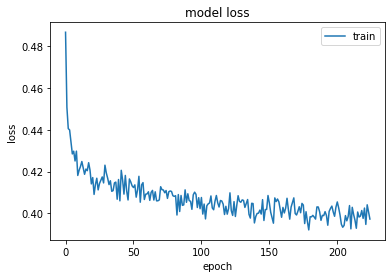

Epoch 1/225
1754/1754 [==============================] - 4s 2ms/step - loss: 0.4859 - binary_accuracy: 0.8103
Epoch 2/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4598 - binary_accuracy: 0.8185
Epoch 3/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4496 - binary_accuracy: 0.8190
Epoch 4/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4450 - binary_accuracy: 0.8169
Epoch 5/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4350 - binary_accuracy: 0.8232
Epoch 6/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4387 - binary_accuracy: 0.8214
Epoch 7/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4369 - binary_accuracy: 0.8182
Epoch 8/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4355 - binary_accuracy: 0.8212
Epoch 9/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4338 - binary_accuracy: 0.8219
Epoch 10/2

1754/1754 [==============================] - 2s 1ms/step - loss: 0.4136 - binary_accuracy: 0.8256
Epoch 75/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4132 - binary_accuracy: 0.8284
Epoch 76/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4206 - binary_accuracy: 0.8237
Epoch 77/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4137 - binary_accuracy: 0.8277
Epoch 78/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4176 - binary_accuracy: 0.8260
Epoch 79/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4086 - binary_accuracy: 0.8275
Epoch 80/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4201 - binary_accuracy: 0.8220
Epoch 81/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4191 - binary_accuracy: 0.8220
Epoch 82/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4102 - binary_accuracy: 0.8287
Epoch 83/225
1

1754/1754 [==============================] - 2s 1ms/step - loss: 0.4124 - binary_accuracy: 0.8296
Epoch 148/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4070 - binary_accuracy: 0.8282
Epoch 149/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4069 - binary_accuracy: 0.8309
Epoch 150/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4067 - binary_accuracy: 0.8247
Epoch 151/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4072 - binary_accuracy: 0.8316
Epoch 152/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4048 - binary_accuracy: 0.8313
Epoch 153/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.3999 - binary_accuracy: 0.8299
Epoch 154/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4094 - binary_accuracy: 0.8283
Epoch 155/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4076 - binary_accuracy: 0.8287
Epoch 

1754/1754 [==============================] - 2s 1ms/step - loss: 0.4041 - binary_accuracy: 0.8309
Epoch 221/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4054 - binary_accuracy: 0.8269
Epoch 222/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4065 - binary_accuracy: 0.8265
Epoch 223/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4011 - binary_accuracy: 0.8280
Epoch 224/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4013 - binary_accuracy: 0.8306
Epoch 225/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4081 - binary_accuracy: 0.8243


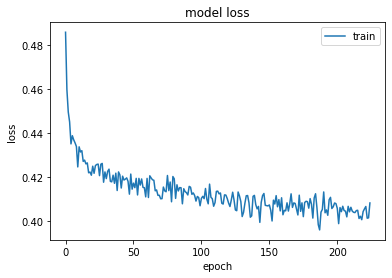

Epoch 1/225
1754/1754 [==============================] - 4s 2ms/step - loss: 0.4858 - binary_accuracy: 0.8095
Epoch 2/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4570 - binary_accuracy: 0.8177
Epoch 3/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4501 - binary_accuracy: 0.8181
Epoch 4/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4438 - binary_accuracy: 0.8222
Epoch 5/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4416 - binary_accuracy: 0.8202
Epoch 6/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4345 - binary_accuracy: 0.8198
Epoch 7/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4352 - binary_accuracy: 0.8226
Epoch 8/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4340 - binary_accuracy: 0.8213
Epoch 9/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4271 - binary_accuracy: 0.8239
Epoch 10/2

1754/1754 [==============================] - 2s 1ms/step - loss: 0.4179 - binary_accuracy: 0.8242
Epoch 75/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4121 - binary_accuracy: 0.8268
Epoch 76/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4186 - binary_accuracy: 0.8257
Epoch 77/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4114 - binary_accuracy: 0.8308
Epoch 78/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4098 - binary_accuracy: 0.8281
Epoch 79/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4116 - binary_accuracy: 0.8256
Epoch 80/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4148 - binary_accuracy: 0.8273
Epoch 81/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4085 - binary_accuracy: 0.8328
Epoch 82/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4118 - binary_accuracy: 0.8276
Epoch 83/225
1

1754/1754 [==============================] - 2s 1ms/step - loss: 0.4053 - binary_accuracy: 0.8246
Epoch 148/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4037 - binary_accuracy: 0.8298
Epoch 149/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4093 - binary_accuracy: 0.8270
Epoch 150/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4080 - binary_accuracy: 0.8282
Epoch 151/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4093 - binary_accuracy: 0.8276
Epoch 152/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4034 - binary_accuracy: 0.8287
Epoch 153/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4059 - binary_accuracy: 0.8311
Epoch 154/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4079 - binary_accuracy: 0.8271
Epoch 155/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4115 - binary_accuracy: 0.8272
Epoch 

1754/1754 [==============================] - 2s 1ms/step - loss: 0.4043 - binary_accuracy: 0.8310
Epoch 221/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4066 - binary_accuracy: 0.8293
Epoch 222/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4059 - binary_accuracy: 0.8317
Epoch 223/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4019 - binary_accuracy: 0.8319
Epoch 224/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4092 - binary_accuracy: 0.8276
Epoch 225/225
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4038 - binary_accuracy: 0.8307


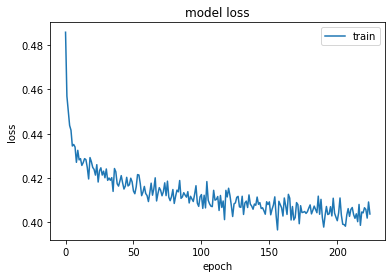

In [91]:
## Run 5-fold cross-validation to get average performance characteristics
unit = 32
ratio = 0.5
epoch = 225
(auroc_list, other_metric_list) = kfold_validation(unit, ratio, epoch, X_train_transformed, y_train, 'patient-id', verbose=1)

In [92]:
## other_metric_list has precision, recall, accuracy, specificity, f1, threshold for metrics
ave_prec = np.mean([x[0] for x in other_metric_list])
print("average precision:" + str(ave_prec))

ave_recall = np.mean([x[1] for x in other_metric_list])
print("average recall:" + str(ave_recall))

ave_specificity = np.mean([x[3] for x in other_metric_list])
print("average specificity:" + str(ave_specificity))

ave_f1 = np.mean([x[4] for x in other_metric_list])
print("average F1:" + str(ave_f1))

average precision:0.36992339887076736
average recall:0.6017645392846498
average specificity:0.7716365581217499
average F1:0.4559408241854614


In [93]:
max_f1 = np.max([x[4] for x in other_metric_list])
print("max F1: " + str(max_f1))

max F1: 0.49248120300751874


In [94]:
## Average metrics performance
print("unit: %d\tepoch: %d\tauroc_mean: %f\tauroc_std: %f"  % (unit, epoch, np.mean(auroc_list), np.std(auroc_list)))

unit: 32	epoch: 225	auroc_mean: 0.728575	auroc_std: 0.010115


In [ ]:
## Scratch code below

In [ ]:
X_train_pad, y_train_pad, X_test_pad, y_test_pad = pad_all(X_train_list, y_train_list, X_test_list, y_test_list, max_timestamps)
y_train_pad = y_train_pad.reshape((2193, 19, 1))

In [297]:
X_train_pad2, y_train_pad2, X_test_pad2, y_test_pad2 = pad_all(X_train_list2, y_train_list2, X_test_list2, y_test_list2, max_timestamps)
y_train_pad2 = y_train_pad2.reshape((2193, 19, 1))

Epoch 1/175
2193/2193 [==============================] - 16s 7ms/step - loss: 0.4879 - binary_accuracy: 0.8142
Epoch 2/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4577 - binary_accuracy: 0.8212
Epoch 3/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4448 - binary_accuracy: 0.8256
Epoch 4/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4469 - binary_accuracy: 0.8225
Epoch 5/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4459 - binary_accuracy: 0.8205
Epoch 6/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4422 - binary_accuracy: 0.8194
Epoch 7/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4407 - binary_accuracy: 0.8198
Epoch 8/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4391 - binary_accuracy: 0.8219
Epoch 9/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4407 - binary_accuracy: 0.8226
Epoch 10/

2193/2193 [==============================] - 2s 1ms/step - loss: 0.4197 - binary_accuracy: 0.8257
Epoch 147/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4162 - binary_accuracy: 0.8276
Epoch 148/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4190 - binary_accuracy: 0.8228
Epoch 149/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4155 - binary_accuracy: 0.8240
Epoch 150/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4169 - binary_accuracy: 0.8296
Epoch 151/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4120 - binary_accuracy: 0.8269
Epoch 152/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4161 - binary_accuracy: 0.8273
Epoch 153/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4174 - binary_accuracy: 0.8230
Epoch 154/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4198 - binary_accuracy: 0.8245
Epoch 

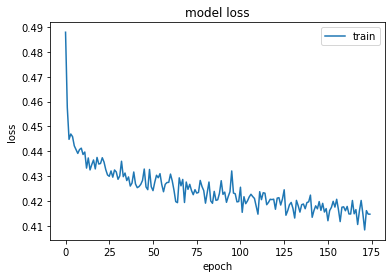

auroc:  0.6873341239622995
f1:  0.40497076023391815
threshold:  0.14993659
precision:  0.2962566844919786
recall:  0.6397228637413395
accuracy:  0.6434515987735436
specificity:  0.6443243243243243
CPU times: user 23min 37s, sys: 5min 16s, total: 28min 54s
Wall time: 7min 4s


In [288]:
%%time
# without previous outcome
seed(1)
set_random_seed(2)
model = build_model(32, 0.5, max_timestamps, n_features)
fit_model(model, 175, X_train_pad, y_train_pad, verbose=1)
y_predict = model.predict(X_test_pad)
y_test_len = [len(y) for y in y_test_list]
y_predict = truncate_prediction(y_predict, y_test_len)
y_true = np.concatenate(y_test_list)
print('auroc: ', auroc(y_predict, y_true))
f1, th = find_best_f1(y_predict, y_true)
print('f1: ', f1);
print('threshold: ', th)
precision, recall, accuracy, specificity = other_metrics(y_predict, y_true, th)
print('precision: ', precision)
print('recall: ', recall)
print('accuracy: ', accuracy)
print('specificity: ', specificity)

Epoch 1/175
2193/2193 [==============================] - 17s 8ms/step - loss: 0.4838 - binary_accuracy: 0.8156
Epoch 2/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4518 - binary_accuracy: 0.8214
Epoch 3/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4390 - binary_accuracy: 0.8264
Epoch 4/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4397 - binary_accuracy: 0.8219
Epoch 5/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4399 - binary_accuracy: 0.8194
Epoch 6/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4371 - binary_accuracy: 0.8214
Epoch 7/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4348 - binary_accuracy: 0.8227
Epoch 8/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4309 - binary_accuracy: 0.8217
Epoch 9/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4274 - binary_accuracy: 0.8267
Epoch 10/

2193/2193 [==============================] - 2s 1ms/step - loss: 0.4110 - binary_accuracy: 0.8247
Epoch 148/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4121 - binary_accuracy: 0.8269
Epoch 149/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4056 - binary_accuracy: 0.8254
Epoch 150/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4070 - binary_accuracy: 0.8304
Epoch 151/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4061 - binary_accuracy: 0.8290
Epoch 152/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4064 - binary_accuracy: 0.8295
Epoch 153/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4083 - binary_accuracy: 0.8294
Epoch 154/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4078 - binary_accuracy: 0.8319
Epoch 155/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4083 - binary_accuracy: 0.8308
Epoch 

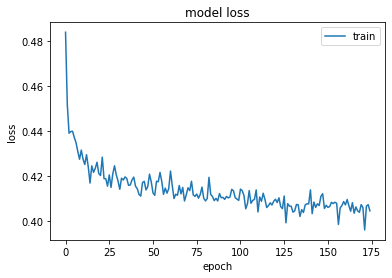

auroc:  0.7282404344298109
f1:  0.44736842105263164
threshold:  0.18023819
precision:  0.37717908082408874
recall:  0.5496535796766744
accuracy:  0.7424441524310118
specificity:  0.7875675675675675
CPU times: user 24min, sys: 5min 19s, total: 29min 19s
Wall time: 7min 15s


In [314]:
%%time
# with previous outcome
# add outcome before scaling
seed(1)
set_random_seed(2)
model = build_model(32, 0.5, max_timestamps, n_features)
fit_model(model, 175, X_train_pad, y_train_pad, verbose=1)
y_predict = model.predict(X_test_pad)
y_test_len = [len(y) for y in y_test_list]
y_predict = truncate_prediction(y_predict, y_test_len)
y_true = np.concatenate(y_test_list)
print('auroc: ', auroc(y_predict, y_true))
f1, th = find_best_f1(y_predict, y_true)
print('f1: ', f1);
print('threshold: ', th)
precision, recall, accuracy, specificity = other_metrics(y_predict, y_true, th)
print('precision: ', precision)
print('recall: ', recall)
print('accuracy: ', accuracy)
print('specificity: ', specificity)

Epoch 1/175
2193/2193 [==============================] - 16s 7ms/step - loss: 0.4838 - binary_accuracy: 0.8156
Epoch 2/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4518 - binary_accuracy: 0.8214
Epoch 3/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4390 - binary_accuracy: 0.8264
Epoch 4/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4397 - binary_accuracy: 0.8219
Epoch 5/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4399 - binary_accuracy: 0.8194
Epoch 6/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4371 - binary_accuracy: 0.8214
Epoch 7/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4348 - binary_accuracy: 0.8227
Epoch 8/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4309 - binary_accuracy: 0.8217
Epoch 9/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4274 - binary_accuracy: 0.8267
Epoch 10/

2193/2193 [==============================] - 2s 1ms/step - loss: 0.4110 - binary_accuracy: 0.8247
Epoch 148/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4121 - binary_accuracy: 0.8267
Epoch 149/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4056 - binary_accuracy: 0.8254
Epoch 150/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4070 - binary_accuracy: 0.8304
Epoch 151/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4061 - binary_accuracy: 0.8288
Epoch 152/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4064 - binary_accuracy: 0.8293
Epoch 153/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4083 - binary_accuracy: 0.8294
Epoch 154/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4078 - binary_accuracy: 0.8319
Epoch 155/175
2193/2193 [==============================] - 2s 1ms/step - loss: 0.4083 - binary_accuracy: 0.8308
Epoch 

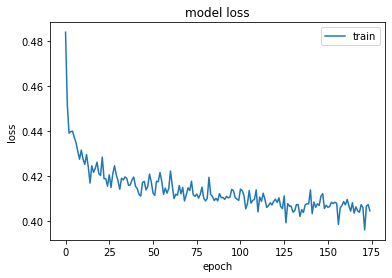

auroc:  0.7282304475376069
f1:  0.44736842105263164
threshold:  0.18045658
precision:  0.37717908082408874
recall:  0.5496535796766744
accuracy:  0.7424441524310118
specificity:  0.7875675675675675
CPU times: user 24min 7s, sys: 5min 22s, total: 29min 29s
Wall time: 7min 19s


In [305]:
%%time
# with previous outcome
# scale before add
seed(1)
set_random_seed(2)
model = build_model(32, 0.5, max_timestamps, n_features2)
fit_model(model, 175, X_train_pad2, y_train_pad2, verbose=1)
y_predict = model.predict(X_test_pad2)
y_test_len = [len(y) for y in y_test_list2]
y_predict = truncate_prediction(y_predict, y_test_len)
y_true = np.concatenate(y_test_list2)
print('auroc: ', auroc(y_predict, y_true))
f1, th = find_best_f1(y_predict, y_true)
print('f1: ', f1);
print('threshold: ', th)
precision, recall, accuracy, specificity = other_metrics(y_predict, y_true, th)
print('precision: ', precision)
print('recall: ', recall)
print('accuracy: ', accuracy)
print('specificity: ', specificity)

In [208]:
# training set performance
y_predict_train = model.predict(X_train_pad)
y_train_len = [len(y) for y in y_train_list]
y_predict_train = truncate_prediction(y_predict_train, y_train_len)
y_true_train = np.concatenate(y_train_list)
print('auroc: ', auroc(y_predict_train, y_true_train))
f1, th = find_best_f1(y_predict_train, y_true_train)
print('f1: ', f1);
print('threshold: ', th)
precision, recall, accuracy, specificity = other_metrics(y_predict_train, y_true_train, th)
print('precision: ', precision)
print('recall: ', recall)
print('accuracy: ', accuracy)
print('specificity: ', specificity)

auroc:  0.7553703453764644
f1:  0.45655608214849924
threshold:  0.20255232
precision:  0.36745073108709475
recall:  0.602711157455683
accuracy:  0.7404263346538389
specificity:  0.7708429295255642


Epoch 1/200
1755/1755 [==============================] - 14s 8ms/step - loss: 0.4920 - binary_accuracy: 0.8122
Epoch 2/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4604 - binary_accuracy: 0.8223
Epoch 3/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4546 - binary_accuracy: 0.8196
Epoch 4/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4409 - binary_accuracy: 0.8238
Epoch 5/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4440 - binary_accuracy: 0.8192
Epoch 6/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4458 - binary_accuracy: 0.8187
Epoch 7/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4450 - binary_accuracy: 0.8204
Epoch 8/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4377 - binary_accuracy: 0.8221
Epoch 9/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4439 - binary_accuracy: 0.8212
Epoch 10/

1755/1755 [==============================] - 2s 1ms/step - loss: 0.4173 - binary_accuracy: 0.8264
Epoch 148/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4152 - binary_accuracy: 0.8293
Epoch 149/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4136 - binary_accuracy: 0.8276
Epoch 150/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4171 - binary_accuracy: 0.8273
Epoch 151/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4094 - binary_accuracy: 0.8299
Epoch 152/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4168 - binary_accuracy: 0.8271
Epoch 153/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4149 - binary_accuracy: 0.8260
Epoch 154/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4139 - binary_accuracy: 0.8241
Epoch 155/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4195 - binary_accuracy: 0.8230
Epoch 

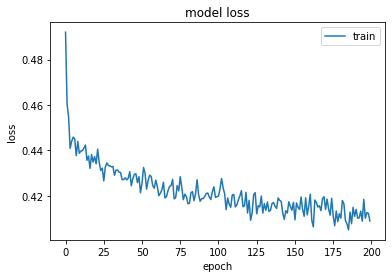

Epoch 1/200
1755/1755 [==============================] - 14s 8ms/step - loss: 0.4897 - binary_accuracy: 0.8173
Epoch 2/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4540 - binary_accuracy: 0.8238
Epoch 3/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4485 - binary_accuracy: 0.8242
Epoch 4/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4450 - binary_accuracy: 0.8243
Epoch 5/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4434 - binary_accuracy: 0.8233
Epoch 6/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4411 - binary_accuracy: 0.8256
Epoch 7/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4468 - binary_accuracy: 0.8190
Epoch 8/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4380 - binary_accuracy: 0.8269
Epoch 9/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4448 - binary_accuracy: 0.8214
Epoch 10/

1755/1755 [==============================] - 2s 1ms/step - loss: 0.4186 - binary_accuracy: 0.8255
Epoch 148/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4161 - binary_accuracy: 0.8342
Epoch 149/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4142 - binary_accuracy: 0.8316
Epoch 150/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4194 - binary_accuracy: 0.8265
Epoch 151/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4217 - binary_accuracy: 0.8273
Epoch 152/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4089 - binary_accuracy: 0.8340
Epoch 153/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4162 - binary_accuracy: 0.8283
Epoch 154/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4182 - binary_accuracy: 0.8257
Epoch 155/200
1755/1755 [==============================] - 2s 1ms/step - loss: 0.4174 - binary_accuracy: 0.8288
Epoch 

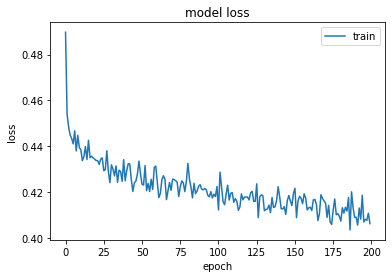

Epoch 1/200
1754/1754 [==============================] - 14s 8ms/step - loss: 0.4911 - binary_accuracy: 0.8142
Epoch 2/200
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4586 - binary_accuracy: 0.8216
Epoch 3/200
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4541 - binary_accuracy: 0.8200
Epoch 4/200
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4436 - binary_accuracy: 0.8269
Epoch 5/200
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4391 - binary_accuracy: 0.8246
Epoch 6/200
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4420 - binary_accuracy: 0.8217
Epoch 7/200
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4409 - binary_accuracy: 0.8229
Epoch 8/200
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4350 - binary_accuracy: 0.8236
Epoch 9/200
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4385 - binary_accuracy: 0.8215
Epoch 10/

1754/1754 [==============================] - 2s 1ms/step - loss: 0.4069 - binary_accuracy: 0.8287
Epoch 148/200
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4147 - binary_accuracy: 0.8269
Epoch 149/200
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4077 - binary_accuracy: 0.8280
Epoch 150/200
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4169 - binary_accuracy: 0.8291
Epoch 151/200
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4131 - binary_accuracy: 0.8263
Epoch 152/200
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4131 - binary_accuracy: 0.8256
Epoch 153/200
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4153 - binary_accuracy: 0.8262
Epoch 154/200
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4112 - binary_accuracy: 0.8301
Epoch 155/200
1754/1754 [==============================] - 2s 1ms/step - loss: 0.4152 - binary_accuracy: 0.8279
Epoch 

In [ ]:
%%time
# K-Fold Cross Validation
result = []
pdic = [(32, [], [0.5])]
for unit, epoch_list, ratio_list in pdic:
    for epoch in epoch_list:
        for ratio in ratio_list:
            auroc_list = kfold_validation(unit, ratio, epoch, X_train_transformed, y_train, 'patient-id', \
                                          verbose=1, max_timestamps=max_timestamps, n_features=n_features)
            result.append((unit, epoch, auroc_list))
            print("unit: %d\tepoch: %d\tauroc_mean: %f\tauroc_std: %f"  % (unit, epoch, np.mean(auroc_list), np.std(auroc_list)))

In [287]:
for unit, epoch, auroc_list in result:
    print("unit: %d\tepoch: %d\tauroc_mean: %f\tauroc_std: %f"  % (unit, epoch, np.mean(auroc_list), np.std(auroc_list)))

unit: 32	epoch: 200	auroc_mean: 0.698378	auroc_std: 0.012308


unit: 32	epoch: 5	auroc_mean: 0.671844	auroc_std: 0.011108
unit: 32	epoch: 50	auroc_mean: 0.689895	auroc_std: 0.011584
unit: 32	epoch: 100	auroc_mean: 0.693467	auroc_std: 0.012354
unit: 32	epoch: 125	auroc_mean: 0.695942	auroc_std: 0.012456
unit: 32	epoch: 150	auroc_mean: 0.697040	auroc_std: 0.012438
unit: 32	epoch: 175	auroc_mean: 0.697905	auroc_std: 0.012803
unit: 32	epoch: 200	auroc_mean: 0.698378	auroc_std: 0.012308

unit: 24	epoch: 50	auroc_mean: 0.688865	auroc_std: 0.009856

W0921 22:26:59.607970 140232604026688 deprecation_wrapper.py:119] From /usr/local/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0921 22:26:59.610222 140232604026688 deprecation_wrapper.py:119] From /usr/local/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0921 22:26:59.612899 140232604026688 deprecation_wrapper.py:119] From /usr/local/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0921 22:26:59.698112 140232604026688 deprecation_wrapper.py:119] From /usr/local/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_

Epoch 1/180
2193/2193 [==============================] - 10s 5ms/step - loss: 0.3686 - binary_accuracy: 0.8738 - val_loss: 0.4698 - val_binary_accuracy: 0.8103
Epoch 2/180
2193/2193 [==============================] - 9s 4ms/step - loss: 0.3552 - binary_accuracy: 0.8750 - val_loss: 0.4686 - val_binary_accuracy: 0.8103
Epoch 3/180
2193/2193 [==============================] - 9s 4ms/step - loss: 0.3537 - binary_accuracy: 0.8749 - val_loss: 0.4665 - val_binary_accuracy: 0.8103
Epoch 4/180
2193/2193 [==============================] - 9s 4ms/step - loss: 0.3508 - binary_accuracy: 0.8753 - val_loss: 0.4662 - val_binary_accuracy: 0.8103
Epoch 5/180
2193/2193 [==============================] - 9s 4ms/step - loss: 0.3498 - binary_accuracy: 0.8753 - val_loss: 0.4645 - val_binary_accuracy: 0.8103
Epoch 6/180
2193/2193 [==============================] - 9s 4ms/step - loss: 0.3462 - binary_accuracy: 0.8749 - val_loss: 0.4634 - val_binary_accuracy: 0.8103
Epoch 7/180
2193/2193 [======================

2193/2193 [==============================] - 9s 4ms/step - loss: 0.3363 - binary_accuracy: 0.8747 - val_loss: 0.4544 - val_binary_accuracy: 0.8108
Epoch 104/180
2193/2193 [==============================] - 9s 4ms/step - loss: 0.3327 - binary_accuracy: 0.8744 - val_loss: 0.4543 - val_binary_accuracy: 0.8112
Epoch 105/180
2193/2193 [==============================] - 9s 4ms/step - loss: 0.3335 - binary_accuracy: 0.8769 - val_loss: 0.4544 - val_binary_accuracy: 0.8112
Epoch 106/180
2193/2193 [==============================] - 9s 4ms/step - loss: 0.3346 - binary_accuracy: 0.8754 - val_loss: 0.4541 - val_binary_accuracy: 0.8112
Epoch 107/180
2193/2193 [==============================] - 9s 4ms/step - loss: 0.3319 - binary_accuracy: 0.8755 - val_loss: 0.4538 - val_binary_accuracy: 0.8112
Epoch 108/180
2193/2193 [==============================] - 9s 4ms/step - loss: 0.3357 - binary_accuracy: 0.8753 - val_loss: 0.4538 - val_binary_accuracy: 0.8112
Epoch 109/180
2193/2193 [=======================

Epoch 154/180
2193/2193 [==============================] - 9s 4ms/step - loss: 0.3317 - binary_accuracy: 0.8763 - val_loss: 0.4527 - val_binary_accuracy: 0.8117
Epoch 155/180
2193/2193 [==============================] - 9s 4ms/step - loss: 0.3345 - binary_accuracy: 0.8762 - val_loss: 0.4524 - val_binary_accuracy: 0.8117
Epoch 156/180
2193/2193 [==============================] - 9s 4ms/step - loss: 0.3310 - binary_accuracy: 0.8774 - val_loss: 0.4524 - val_binary_accuracy: 0.8117
Epoch 157/180
2193/2193 [==============================] - 9s 4ms/step - loss: 0.3343 - binary_accuracy: 0.8761 - val_loss: 0.4525 - val_binary_accuracy: 0.8117
Epoch 158/180
2193/2193 [==============================] - 9s 4ms/step - loss: 0.3311 - binary_accuracy: 0.8760 - val_loss: 0.4525 - val_binary_accuracy: 0.8125
Epoch 159/180
2193/2193 [==============================] - 9s 4ms/step - loss: 0.3314 - binary_accuracy: 0.8764 - val_loss: 0.4526 - val_binary_accuracy: 0.8121
Epoch 160/180
2193/2193 [=========

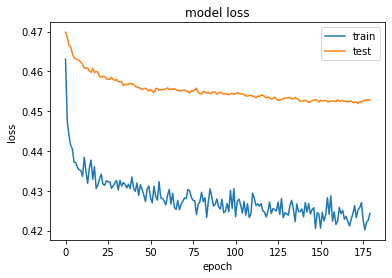

avg auroc:  0.7059571811996754
avg precision:  0.331151832460733
avg recall:  0.5842956120092379
avg accuracy:  0.6973280770915462
avg specificity:  0.7237837837837838
avg f1:  0.42272347535505433
auroc:  [0.7059571811996754]
precision:  [0.331151832460733]
recall:  [0.5842956120092379]
accuracy:  [0.6973280770915462]
specificity:  [0.7237837837837838]
f1:  [0.42272347535505433]
threshold:  [0.1600648]
CPU times: user 1h 9min 54s, sys: 12min 30s, total: 1h 22min 25s
Wall time: 26min 54s


In [52]:
%%time
seed(1)
set_random_seed(2)
auroc_list = []
precision_list = []
recall_list = []
accuracy_list = []
specificity_list = []
f1_list = []
th_list = []
for i in range(0,1):
    model = build_model(32, 0.5, 1, X_train_list[0][0].shape[0])
    history = fit_model(model, 180, X_train_list, y_train_list, X_test_list, y_test_list, verbose=1)
    y_predict = model.predict_generator(mygenerator(X_test_list), steps=len(X_test_list))
    y_predict = np.concatenate(y_predict)
    y_true = np.concatenate(y_test_list)
    auroc_list.append(auroc(y_predict, y_true))
    f1, th = find_best_f1(y_predict, y_true)
    f1_list.append(f1)
    th_list.append(th)
    precision, recall, accuracy, specificity = other_metrics(y_predict, y_true, th)
    precision_list.append(precision)
    recall_list.append(recall)
    accuracy_list.append(accuracy)
    specificity_list.append(specificity)
print('avg auroc: ', np.mean(auroc_list))
print('avg precision: ', np.mean(precision_list))
print('avg recall: ', np.mean(recall_list))
print('avg accuracy: ', np.mean(accuracy_list))
print('avg specificity: ', np.mean(specificity_list))
print('avg f1: ', np.mean(f1_list));
print('auroc: ', auroc_list)
print('precision: ', precision_list)
print('recall: ', recall_list)
print('accuracy: ', accuracy_list)
print('specificity: ', specificity_list)
print('f1: ', f1_list);
print('threshold: ', th_list)

In [78]:
y_predict_t = model.predict_generator(mygenerator(X_train_list), steps=len(X_train_list))
y_predict_t = np.concatenate(y_predict_t)
y_true_t = np.concatenate(y_train_list)

f1_t, th_t = find_best_f1(y_predict_t, y_true_t)
precision_t, recall_t, accuracy_t, specificity_t = other_metrics(y_predict_t, y_true_t, th_t)

print('auroc: ', auroc(y_predict_t, y_true_t))
print('precision: ', precision_t)
print('recall: ', recall_t)
print('accuracy: ', accuracy_t)
print('specificity: ', specificity_t)
print('f1: ', f1_t);
print('threshold: ', th_t)

('auroc: ', 0.7410817821285923)
('precision: ', 0.3654104979811575)
('recall: ', 0.5552147239263804)
('accuracy: ', 0.7405385049896441)
('specificity: ', 0.7823678744518809)
('f1: ', 0.4407467532467533)
('threshold: ', 0.22387436)


In [93]:
# from sklearn.calibration import calibration_curve
# # fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_predict, n_bins=10)
# fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_predict, normalize=True, n_bins=10)
# with open("exp_1_cal.csv", "w") as writeFile:
#     writer  = csv.writer(writeFile)
#     writer.writerows([fraction_of_positives, mean_predicted_value])

# plt.figure()
# plt.plot(mean_predicted_value, fraction_of_positives, 's-')
# plt.plot([0, 1], [0, 1], '--', color='gray')
# plt.show()

In [95]:
# import csv 
# fpr, tpr, thresholds = roc_curve(y_true, y_predict, pos_label=1)
# plot_roc_curve(fpr, tpr)
# with open("exp_1.csv", "w") as writeFile:
#     writer  = csv.writer(writeFile)
#     writer.writerows([fpr, tpr, [recall, 1-specificity]])

Epoch 1/180
2193/2193 [==============================] - 19s 8ms/step - loss: 0.3786 - binary_accuracy: 0.8707 - val_loss: 0.4663 - val_binary_accuracy: 0.8128
Epoch 2/180
2193/2193 [==============================] - 12s 5ms/step - loss: 0.3628 - binary_accuracy: 0.8714 - val_loss: 0.4615 - val_binary_accuracy: 0.8128
Epoch 3/180
2193/2193 [==============================] - 12s 6ms/step - loss: 0.3610 - binary_accuracy: 0.8714 - val_loss: 0.4596 - val_binary_accuracy: 0.8128
Epoch 4/180
2193/2193 [==============================] - 13s 6ms/step - loss: 0.3583 - binary_accuracy: 0.8716 - val_loss: 0.4573 - val_binary_accuracy: 0.8128
Epoch 5/180
2193/2193 [==============================] - 13s 6ms/step - loss: 0.3580 - binary_accuracy: 0.8716 - val_loss: 0.4572 - val_binary_accuracy: 0.8128
Epoch 6/180
2193/2193 [==============================] - 12s 6ms/step - loss: 0.3550 - binary_accuracy: 0.8710 - val_loss: 0.4562 - val_binary_accuracy: 0.8128
Epoch 7/180
2193/2193 [=================

Epoch 52/180
2193/2193 [==============================] - 12s 5ms/step - loss: 0.3453 - binary_accuracy: 0.8724 - val_loss: 0.4447 - val_binary_accuracy: 0.8128
Epoch 53/180
2193/2193 [==============================] - 11s 5ms/step - loss: 0.3457 - binary_accuracy: 0.8723 - val_loss: 0.4442 - val_binary_accuracy: 0.8128
Epoch 54/180
2193/2193 [==============================] - 12s 5ms/step - loss: 0.3439 - binary_accuracy: 0.8734 - val_loss: 0.4441 - val_binary_accuracy: 0.8128
Epoch 55/180
2193/2193 [==============================] - 12s 5ms/step - loss: 0.3461 - binary_accuracy: 0.8715 - val_loss: 0.4443 - val_binary_accuracy: 0.8128
Epoch 56/180
2193/2193 [==============================] - 12s 5ms/step - loss: 0.3468 - binary_accuracy: 0.8716 - val_loss: 0.4439 - val_binary_accuracy: 0.8128
Epoch 57/180
2193/2193 [==============================] - 11s 5ms/step - loss: 0.3444 - binary_accuracy: 0.8708 - val_loss: 0.4442 - val_binary_accuracy: 0.8128
Epoch 58/180
2193/2193 [==========

2193/2193 [==============================] - 7s 3ms/step - loss: 0.3428 - binary_accuracy: 0.8710 - val_loss: 0.4405 - val_binary_accuracy: 0.8128
Epoch 104/180
2193/2193 [==============================] - 7s 3ms/step - loss: 0.3383 - binary_accuracy: 0.8725 - val_loss: 0.4407 - val_binary_accuracy: 0.8128
Epoch 105/180
2193/2193 [==============================] - 7s 3ms/step - loss: 0.3425 - binary_accuracy: 0.8726 - val_loss: 0.4400 - val_binary_accuracy: 0.8128
Epoch 106/180
2193/2193 [==============================] - 8s 4ms/step - loss: 0.3422 - binary_accuracy: 0.8718 - val_loss: 0.4401 - val_binary_accuracy: 0.8128
Epoch 107/180
2193/2193 [==============================] - 7s 3ms/step - loss: 0.3411 - binary_accuracy: 0.8715 - val_loss: 0.4404 - val_binary_accuracy: 0.8128
Epoch 108/180
2193/2193 [==============================] - 7s 3ms/step - loss: 0.3438 - binary_accuracy: 0.8728 - val_loss: 0.4400 - val_binary_accuracy: 0.8128
Epoch 109/180
2193/2193 [=======================

Epoch 154/180
2193/2193 [==============================] - 8s 3ms/step - loss: 0.3409 - binary_accuracy: 0.8731 - val_loss: 0.4388 - val_binary_accuracy: 0.8128
Epoch 155/180
2193/2193 [==============================] - 7s 3ms/step - loss: 0.3415 - binary_accuracy: 0.8718 - val_loss: 0.4384 - val_binary_accuracy: 0.8128
Epoch 156/180
2193/2193 [==============================] - 8s 3ms/step - loss: 0.3403 - binary_accuracy: 0.8729 - val_loss: 0.4388 - val_binary_accuracy: 0.8128
Epoch 157/180
2193/2193 [==============================] - 7s 3ms/step - loss: 0.3396 - binary_accuracy: 0.8724 - val_loss: 0.4391 - val_binary_accuracy: 0.8128
Epoch 158/180
2193/2193 [==============================] - 8s 3ms/step - loss: 0.3396 - binary_accuracy: 0.8742 - val_loss: 0.4389 - val_binary_accuracy: 0.8128
Epoch 159/180
2193/2193 [==============================] - 8s 3ms/step - loss: 0.3387 - binary_accuracy: 0.8726 - val_loss: 0.4386 - val_binary_accuracy: 0.8128
Epoch 160/180
2193/2193 [=========

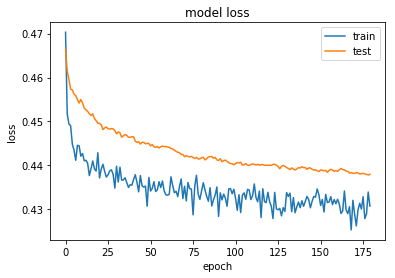

Epoch 1/180
2193/2193 [==============================] - 8s 4ms/step - loss: 0.3822 - binary_accuracy: 0.8711 - val_loss: 0.4719 - val_binary_accuracy: 0.8128
Epoch 2/180
2193/2193 [==============================] - 7s 3ms/step - loss: 0.3667 - binary_accuracy: 0.8711 - val_loss: 0.4656 - val_binary_accuracy: 0.8128
Epoch 3/180
2193/2193 [==============================] - 7s 3ms/step - loss: 0.3627 - binary_accuracy: 0.8711 - val_loss: 0.4633 - val_binary_accuracy: 0.8128
Epoch 4/180
2193/2193 [==============================] - 7s 3ms/step - loss: 0.3601 - binary_accuracy: 0.8712 - val_loss: 0.4620 - val_binary_accuracy: 0.8128
Epoch 5/180
2193/2193 [==============================] - 7s 3ms/step - loss: 0.3558 - binary_accuracy: 0.8711 - val_loss: 0.4616 - val_binary_accuracy: 0.8128
Epoch 6/180
2193/2193 [==============================] - 7s 3ms/step - loss: 0.3555 - binary_accuracy: 0.8710 - val_loss: 0.4596 - val_binary_accuracy: 0.8128
Epoch 7/180
2193/2193 [=======================

2193/2193 [==============================] - 12s 5ms/step - loss: 0.3397 - binary_accuracy: 0.8716 - val_loss: 0.4406 - val_binary_accuracy: 0.8122
Epoch 104/180
2193/2193 [==============================] - 12s 6ms/step - loss: 0.3461 - binary_accuracy: 0.8705 - val_loss: 0.4407 - val_binary_accuracy: 0.8122
Epoch 105/180
2193/2193 [==============================] - 12s 5ms/step - loss: 0.3438 - binary_accuracy: 0.8720 - val_loss: 0.4406 - val_binary_accuracy: 0.8122
Epoch 106/180
2193/2193 [==============================] - 12s 6ms/step - loss: 0.3445 - binary_accuracy: 0.8723 - val_loss: 0.4406 - val_binary_accuracy: 0.8122
Epoch 107/180
2193/2193 [==============================] - 11s 5ms/step - loss: 0.3419 - binary_accuracy: 0.8716 - val_loss: 0.4407 - val_binary_accuracy: 0.8122
Epoch 108/180
2193/2193 [==============================] - 11s 5ms/step - loss: 0.3422 - binary_accuracy: 0.8713 - val_loss: 0.4403 - val_binary_accuracy: 0.8122
Epoch 109/180
2193/2193 [=================

Epoch 154/180
2193/2193 [==============================] - 10s 4ms/step - loss: 0.3392 - binary_accuracy: 0.8732 - val_loss: 0.4396 - val_binary_accuracy: 0.8128
Epoch 155/180
2193/2193 [==============================] - 10s 4ms/step - loss: 0.3412 - binary_accuracy: 0.8727 - val_loss: 0.4393 - val_binary_accuracy: 0.8128
Epoch 156/180
2193/2193 [==============================] - 10s 4ms/step - loss: 0.3403 - binary_accuracy: 0.8707 - val_loss: 0.4393 - val_binary_accuracy: 0.8128
Epoch 157/180
2193/2193 [==============================] - 10s 5ms/step - loss: 0.3409 - binary_accuracy: 0.8700 - val_loss: 0.4392 - val_binary_accuracy: 0.8128
Epoch 158/180
2193/2193 [==============================] - 10s 4ms/step - loss: 0.3391 - binary_accuracy: 0.8723 - val_loss: 0.4393 - val_binary_accuracy: 0.8128
Epoch 159/180
2193/2193 [==============================] - 10s 4ms/step - loss: 0.3403 - binary_accuracy: 0.8714 - val_loss: 0.4393 - val_binary_accuracy: 0.8128
Epoch 160/180
2193/2193 [===

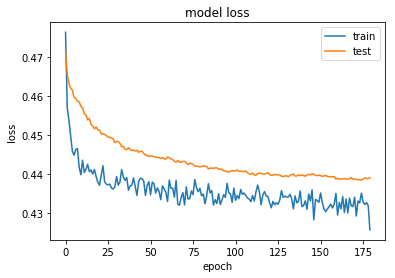

Epoch 1/180
2193/2193 [==============================] - 7s 3ms/step - loss: 0.3780 - binary_accuracy: 0.8708 - val_loss: 0.4673 - val_binary_accuracy: 0.8128
Epoch 2/180
2193/2193 [==============================] - 5s 2ms/step - loss: 0.3664 - binary_accuracy: 0.8712 - val_loss: 0.4633 - val_binary_accuracy: 0.8128
Epoch 3/180
2193/2193 [==============================] - 5s 2ms/step - loss: 0.3619 - binary_accuracy: 0.8711 - val_loss: 0.4629 - val_binary_accuracy: 0.8128
Epoch 4/180
2193/2193 [==============================] - 5s 2ms/step - loss: 0.3612 - binary_accuracy: 0.8712 - val_loss: 0.4597 - val_binary_accuracy: 0.8128
Epoch 5/180
2193/2193 [==============================] - 5s 2ms/step - loss: 0.3593 - binary_accuracy: 0.8716 - val_loss: 0.4596 - val_binary_accuracy: 0.8128
Epoch 6/180
2193/2193 [==============================] - 5s 2ms/step - loss: 0.3566 - binary_accuracy: 0.8720 - val_loss: 0.4589 - val_binary_accuracy: 0.8128
Epoch 7/180
2193/2193 [=======================

2193/2193 [==============================] - 6s 3ms/step - loss: 0.3419 - binary_accuracy: 0.8719 - val_loss: 0.4409 - val_binary_accuracy: 0.8122
Epoch 104/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3414 - binary_accuracy: 0.8707 - val_loss: 0.4406 - val_binary_accuracy: 0.8122
Epoch 105/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3418 - binary_accuracy: 0.8721 - val_loss: 0.4405 - val_binary_accuracy: 0.8122
Epoch 106/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3419 - binary_accuracy: 0.8728 - val_loss: 0.4405 - val_binary_accuracy: 0.8122
Epoch 107/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3463 - binary_accuracy: 0.8716 - val_loss: 0.4400 - val_binary_accuracy: 0.8122
Epoch 108/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3441 - binary_accuracy: 0.8724 - val_loss: 0.4400 - val_binary_accuracy: 0.8122
Epoch 109/180
2193/2193 [=======================

Epoch 154/180
2193/2193 [==============================] - 5s 2ms/step - loss: 0.3392 - binary_accuracy: 0.8727 - val_loss: 0.4386 - val_binary_accuracy: 0.8115
Epoch 155/180
2193/2193 [==============================] - 7s 3ms/step - loss: 0.3405 - binary_accuracy: 0.8732 - val_loss: 0.4386 - val_binary_accuracy: 0.8115
Epoch 156/180
2193/2193 [==============================] - 8s 4ms/step - loss: 0.3387 - binary_accuracy: 0.8732 - val_loss: 0.4386 - val_binary_accuracy: 0.8115
Epoch 157/180
2193/2193 [==============================] - 8s 4ms/step - loss: 0.3375 - binary_accuracy: 0.8737 - val_loss: 0.4390 - val_binary_accuracy: 0.8115
Epoch 158/180
2193/2193 [==============================] - 7s 3ms/step - loss: 0.3409 - binary_accuracy: 0.8723 - val_loss: 0.4386 - val_binary_accuracy: 0.8115
Epoch 159/180
2193/2193 [==============================] - 9s 4ms/step - loss: 0.3406 - binary_accuracy: 0.8724 - val_loss: 0.4388 - val_binary_accuracy: 0.8115
Epoch 160/180
2193/2193 [=========

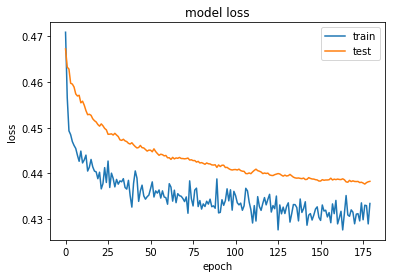

Epoch 1/180
2193/2193 [==============================] - 8s 4ms/step - loss: 0.3825 - binary_accuracy: 0.8711 - val_loss: 0.4688 - val_binary_accuracy: 0.8128
Epoch 2/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3625 - binary_accuracy: 0.8711 - val_loss: 0.4643 - val_binary_accuracy: 0.8128
Epoch 3/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3610 - binary_accuracy: 0.8712 - val_loss: 0.4613 - val_binary_accuracy: 0.8128
Epoch 4/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3564 - binary_accuracy: 0.8709 - val_loss: 0.4590 - val_binary_accuracy: 0.8128
Epoch 5/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3556 - binary_accuracy: 0.8713 - val_loss: 0.4566 - val_binary_accuracy: 0.8128
Epoch 6/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3577 - binary_accuracy: 0.8712 - val_loss: 0.4563 - val_binary_accuracy: 0.8128
Epoch 7/180
2193/2193 [=======================

2193/2193 [==============================] - 6s 3ms/step - loss: 0.3411 - binary_accuracy: 0.8727 - val_loss: 0.4388 - val_binary_accuracy: 0.8135
Epoch 104/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3407 - binary_accuracy: 0.8726 - val_loss: 0.4388 - val_binary_accuracy: 0.8135
Epoch 105/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3403 - binary_accuracy: 0.8724 - val_loss: 0.4385 - val_binary_accuracy: 0.8135
Epoch 106/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3399 - binary_accuracy: 0.8726 - val_loss: 0.4385 - val_binary_accuracy: 0.8128
Epoch 107/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3407 - binary_accuracy: 0.8734 - val_loss: 0.4384 - val_binary_accuracy: 0.8128
Epoch 108/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3410 - binary_accuracy: 0.8713 - val_loss: 0.4386 - val_binary_accuracy: 0.8135
Epoch 109/180
2193/2193 [=======================

Epoch 154/180
2193/2193 [==============================] - 14s 6ms/step - loss: 0.3420 - binary_accuracy: 0.8726 - val_loss: 0.4374 - val_binary_accuracy: 0.8142
Epoch 155/180
2193/2193 [==============================] - 13s 6ms/step - loss: 0.3381 - binary_accuracy: 0.8734 - val_loss: 0.4373 - val_binary_accuracy: 0.8142
Epoch 156/180
2193/2193 [==============================] - 13s 6ms/step - loss: 0.3402 - binary_accuracy: 0.8719 - val_loss: 0.4374 - val_binary_accuracy: 0.8142
Epoch 157/180
2193/2193 [==============================] - 15s 7ms/step - loss: 0.3424 - binary_accuracy: 0.8709 - val_loss: 0.4372 - val_binary_accuracy: 0.8142
Epoch 158/180
2193/2193 [==============================] - 16s 7ms/step - loss: 0.3379 - binary_accuracy: 0.8734 - val_loss: 0.4374 - val_binary_accuracy: 0.8142
Epoch 159/180
2193/2193 [==============================] - 16s 7ms/step - loss: 0.3377 - binary_accuracy: 0.8715 - val_loss: 0.4376 - val_binary_accuracy: 0.8142
Epoch 160/180
2193/2193 [===

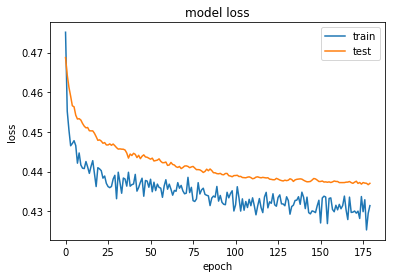

Epoch 1/180
2193/2193 [==============================] - 24s 11ms/step - loss: 0.3824 - binary_accuracy: 0.8707 - val_loss: 0.4669 - val_binary_accuracy: 0.8128
Epoch 2/180
2193/2193 [==============================] - 15s 7ms/step - loss: 0.3656 - binary_accuracy: 0.8711 - val_loss: 0.4623 - val_binary_accuracy: 0.8128
Epoch 3/180
2193/2193 [==============================] - 15s 7ms/step - loss: 0.3578 - binary_accuracy: 0.8712 - val_loss: 0.4590 - val_binary_accuracy: 0.8128
Epoch 4/180
2193/2193 [==============================] - 15s 7ms/step - loss: 0.3582 - binary_accuracy: 0.8717 - val_loss: 0.4574 - val_binary_accuracy: 0.8128
Epoch 5/180
2193/2193 [==============================] - 15s 7ms/step - loss: 0.3567 - binary_accuracy: 0.8711 - val_loss: 0.4560 - val_binary_accuracy: 0.8128
Epoch 6/180
2193/2193 [==============================] - 16s 7ms/step - loss: 0.3559 - binary_accuracy: 0.8717 - val_loss: 0.4549 - val_binary_accuracy: 0.8128
Epoch 7/180
2193/2193 [================

Epoch 52/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3449 - binary_accuracy: 0.8717 - val_loss: 0.4422 - val_binary_accuracy: 0.8128
Epoch 53/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3469 - binary_accuracy: 0.8727 - val_loss: 0.4422 - val_binary_accuracy: 0.8128
Epoch 54/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3486 - binary_accuracy: 0.8711 - val_loss: 0.4423 - val_binary_accuracy: 0.8128
Epoch 55/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3465 - binary_accuracy: 0.8716 - val_loss: 0.4415 - val_binary_accuracy: 0.8128
Epoch 56/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3451 - binary_accuracy: 0.8714 - val_loss: 0.4417 - val_binary_accuracy: 0.8128
Epoch 57/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3417 - binary_accuracy: 0.8726 - val_loss: 0.4421 - val_binary_accuracy: 0.8128
Epoch 58/180
2193/2193 [================

Epoch 154/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3408 - binary_accuracy: 0.8730 - val_loss: 0.4365 - val_binary_accuracy: 0.8122
Epoch 155/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3417 - binary_accuracy: 0.8713 - val_loss: 0.4366 - val_binary_accuracy: 0.8122
Epoch 156/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3440 - binary_accuracy: 0.8730 - val_loss: 0.4364 - val_binary_accuracy: 0.8122
Epoch 157/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3411 - binary_accuracy: 0.8724 - val_loss: 0.4363 - val_binary_accuracy: 0.8122
Epoch 158/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3436 - binary_accuracy: 0.8719 - val_loss: 0.4366 - val_binary_accuracy: 0.8122
Epoch 159/180
2193/2193 [==============================] - 6s 3ms/step - loss: 0.3389 - binary_accuracy: 0.8713 - val_loss: 0.4365 - val_binary_accuracy: 0.8122
Epoch 160/180
2193/2193 [=========

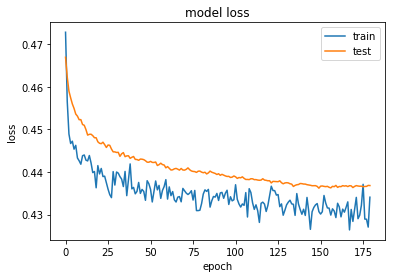

('avg auroc: ', 0.7266380492629534)
('avg precision: ', 0.3472347295691086)
('avg recall: ', 0.6070671378091872)
('avg accuracy: ', 0.7116402116402117)
('avg specificity: ', 0.735720097640358)
('avg f1: ', 0.4408103615995471)
('auroc: ', [0.7288007429407689, 0.7233753202206972, 0.7251349167785583, 0.728343592854658, 0.7275356735200844])
('precision: ', [0.3416988416988417, 0.3302238805970149, 0.3401869158878505, 0.35208333333333336, 0.3719806763285024])
('recall: ', [0.6254416961130742, 0.6254416961130742, 0.6431095406360424, 0.5971731448763251, 0.5441696113074205])
('accuracy: ', [0.7043650793650794, 0.6924603174603174, 0.6997354497354498, 0.718915343915344, 0.7427248677248677])
('specificity: ', [0.7225386493083807, 0.7078925956061839, 0.7127746135069162, 0.7469487388120423, 0.7884458909682669])
('f1: ', [0.44194756554307113, 0.43223443223443225, 0.4449877750611248, 0.44298820445609444, 0.44189383070301286])
('threshold: ', [0.15807657, 0.15955122, 0.16049157, 0.16895026, 0.18958326]

In [76]:
%%time
seed(1)
set_random_seed(2)
auroc_list = []
precision_list = []
recall_list = []
accuracy_list = []
specificity_list = []
f1_list = []
th_list = []
for i in range(0,5):
    model = build_model(32, 0.5, 1, X_train_list[0][0].shape[0])
    history = fit_model(model, 180, X_train_list, y_train_list, X_test_list, y_test_list, verbose=1)
    y_predict = model.predict_generator(mygenerator(X_test_list), steps=len(X_test_list))
    y_predict = np.concatenate(y_predict)
    y_true = np.concatenate(y_test_list)
    auroc_list.append(auroc(y_predict, y_true))
    f1, th = find_best_f1(y_predict, y_true)
    f1_list.append(f1)
    th_list.append(th)
    precision, recall, accuracy, specificity = other_metrics(y_predict, y_true, th)
    precision_list.append(precision)
    recall_list.append(recall)
    accuracy_list.append(accuracy)
    specificity_list.append(specificity)
print('avg auroc: ', np.mean(auroc_list))
print('avg precision: ', np.mean(precision_list))
print('avg recall: ', np.mean(recall_list))
print('avg accuracy: ', np.mean(accuracy_list))
print('avg specificity: ', np.mean(specificity_list))
print('avg f1: ', np.mean(f1_list));
print('auroc: ', auroc_list)
print('precision: ', precision_list)
print('recall: ', recall_list)
print('accuracy: ', accuracy_list)
print('specificity: ', specificity_list)
print('f1: ', f1_list);
print('threshold: ', th_list)

Epoch 1/225
1755/1755 [==============================] - 12s 7ms/step - loss: 0.3726 - binary_accuracy: 0.8740 - val_loss: 0.4428 - val_binary_accuracy: 0.8228
Epoch 2/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3551 - binary_accuracy: 0.8752 - val_loss: 0.4375 - val_binary_accuracy: 0.8228
Epoch 3/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3515 - binary_accuracy: 0.8752 - val_loss: 0.4353 - val_binary_accuracy: 0.8228
Epoch 4/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3513 - binary_accuracy: 0.8752 - val_loss: 0.4345 - val_binary_accuracy: 0.8228
Epoch 5/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3485 - binary_accuracy: 0.8752 - val_loss: 0.4334 - val_binary_accuracy: 0.8228
Epoch 6/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3442 - binary_accuracy: 0.8753 - val_loss: 0.4332 - val_binary_accuracy: 0.8228
Epoch 7/225
1755/1755 [======================

1755/1755 [==============================] - 7s 4ms/step - loss: 0.3315 - binary_accuracy: 0.8781 - val_loss: 0.4321 - val_binary_accuracy: 0.8266
Epoch 104/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3295 - binary_accuracy: 0.8776 - val_loss: 0.4321 - val_binary_accuracy: 0.8266
Epoch 105/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3266 - binary_accuracy: 0.8774 - val_loss: 0.4321 - val_binary_accuracy: 0.8266
Epoch 106/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3284 - binary_accuracy: 0.8773 - val_loss: 0.4322 - val_binary_accuracy: 0.8266
Epoch 107/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3296 - binary_accuracy: 0.8763 - val_loss: 0.4323 - val_binary_accuracy: 0.8266
Epoch 108/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3298 - binary_accuracy: 0.8759 - val_loss: 0.4321 - val_binary_accuracy: 0.8266
Epoch 109/225
1755/1755 [=======================

Epoch 154/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3261 - binary_accuracy: 0.8768 - val_loss: 0.4321 - val_binary_accuracy: 0.8275
Epoch 155/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3267 - binary_accuracy: 0.8774 - val_loss: 0.4322 - val_binary_accuracy: 0.8275
Epoch 156/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3269 - binary_accuracy: 0.8772 - val_loss: 0.4323 - val_binary_accuracy: 0.8275
Epoch 157/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3255 - binary_accuracy: 0.8765 - val_loss: 0.4323 - val_binary_accuracy: 0.8275
Epoch 158/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3283 - binary_accuracy: 0.8788 - val_loss: 0.4323 - val_binary_accuracy: 0.8275
Epoch 159/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3257 - binary_accuracy: 0.8777 - val_loss: 0.4324 - val_binary_accuracy: 0.8285
Epoch 160/225
1755/1755 [=========

Epoch 205/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3178 - binary_accuracy: 0.8798 - val_loss: 0.4324 - val_binary_accuracy: 0.8322
Epoch 206/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3249 - binary_accuracy: 0.8774 - val_loss: 0.4325 - val_binary_accuracy: 0.8313
Epoch 207/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3232 - binary_accuracy: 0.8775 - val_loss: 0.4325 - val_binary_accuracy: 0.8303
Epoch 208/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3201 - binary_accuracy: 0.8756 - val_loss: 0.4325 - val_binary_accuracy: 0.8285
Epoch 209/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3196 - binary_accuracy: 0.8788 - val_loss: 0.4326 - val_binary_accuracy: 0.8285
Epoch 210/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3223 - binary_accuracy: 0.8776 - val_loss: 0.4327 - val_binary_accuracy: 0.8303
Epoch 211/225
1755/1755 [=========

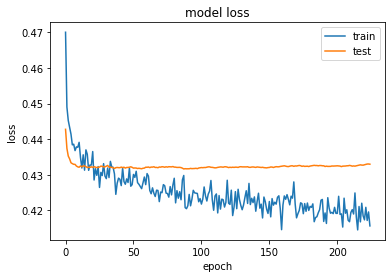

Epoch 1/225
1755/1755 [==============================] - 12s 7ms/step - loss: 0.3690 - binary_accuracy: 0.8756 - val_loss: 0.4585 - val_binary_accuracy: 0.8123
Epoch 2/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3521 - binary_accuracy: 0.8774 - val_loss: 0.4490 - val_binary_accuracy: 0.8123
Epoch 3/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3499 - binary_accuracy: 0.8772 - val_loss: 0.4472 - val_binary_accuracy: 0.8123
Epoch 4/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3457 - binary_accuracy: 0.8774 - val_loss: 0.4449 - val_binary_accuracy: 0.8123
Epoch 5/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3459 - binary_accuracy: 0.8774 - val_loss: 0.4442 - val_binary_accuracy: 0.8123
Epoch 6/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3496 - binary_accuracy: 0.8779 - val_loss: 0.4420 - val_binary_accuracy: 0.8123
Epoch 7/225
1755/1755 [======================

1755/1755 [==============================] - 7s 4ms/step - loss: 0.3311 - binary_accuracy: 0.8795 - val_loss: 0.4318 - val_binary_accuracy: 0.8113
Epoch 104/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3291 - binary_accuracy: 0.8790 - val_loss: 0.4318 - val_binary_accuracy: 0.8113
Epoch 105/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3288 - binary_accuracy: 0.8815 - val_loss: 0.4318 - val_binary_accuracy: 0.8104
Epoch 106/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3288 - binary_accuracy: 0.8788 - val_loss: 0.4318 - val_binary_accuracy: 0.8104
Epoch 107/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3294 - binary_accuracy: 0.8791 - val_loss: 0.4318 - val_binary_accuracy: 0.8104
Epoch 108/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3302 - binary_accuracy: 0.8798 - val_loss: 0.4319 - val_binary_accuracy: 0.8113
Epoch 109/225
1755/1755 [=======================

Epoch 154/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3292 - binary_accuracy: 0.8790 - val_loss: 0.4316 - val_binary_accuracy: 0.8104
Epoch 155/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3281 - binary_accuracy: 0.8807 - val_loss: 0.4318 - val_binary_accuracy: 0.8104
Epoch 156/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3305 - binary_accuracy: 0.8792 - val_loss: 0.4317 - val_binary_accuracy: 0.8104
Epoch 157/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3300 - binary_accuracy: 0.8793 - val_loss: 0.4316 - val_binary_accuracy: 0.8104
Epoch 158/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3284 - binary_accuracy: 0.8797 - val_loss: 0.4316 - val_binary_accuracy: 0.8104
Epoch 159/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3319 - binary_accuracy: 0.8791 - val_loss: 0.4315 - val_binary_accuracy: 0.8104
Epoch 160/225
1755/1755 [=========

Epoch 205/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3285 - binary_accuracy: 0.8802 - val_loss: 0.4315 - val_binary_accuracy: 0.8094
Epoch 206/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3271 - binary_accuracy: 0.8786 - val_loss: 0.4315 - val_binary_accuracy: 0.8094
Epoch 207/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3255 - binary_accuracy: 0.8820 - val_loss: 0.4316 - val_binary_accuracy: 0.8104
Epoch 208/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3252 - binary_accuracy: 0.8803 - val_loss: 0.4316 - val_binary_accuracy: 0.8104
Epoch 209/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3256 - binary_accuracy: 0.8812 - val_loss: 0.4315 - val_binary_accuracy: 0.8104
Epoch 210/225
1755/1755 [==============================] - 7s 4ms/step - loss: 0.3212 - binary_accuracy: 0.8796 - val_loss: 0.4314 - val_binary_accuracy: 0.8094
Epoch 211/225
1755/1755 [=========

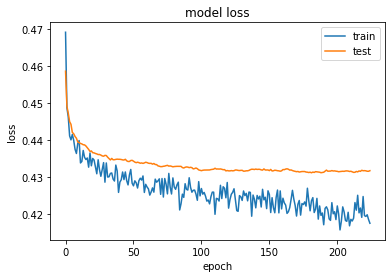

Epoch 1/225
1754/1754 [==============================] - 12s 7ms/step - loss: 0.3724 - binary_accuracy: 0.8749 - val_loss: 0.4768 - val_binary_accuracy: 0.8075
Epoch 2/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3534 - binary_accuracy: 0.8765 - val_loss: 0.4681 - val_binary_accuracy: 0.8075
Epoch 3/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3529 - binary_accuracy: 0.8760 - val_loss: 0.4631 - val_binary_accuracy: 0.8075
Epoch 4/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3487 - binary_accuracy: 0.8762 - val_loss: 0.4600 - val_binary_accuracy: 0.8075
Epoch 5/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3485 - binary_accuracy: 0.8762 - val_loss: 0.4580 - val_binary_accuracy: 0.8075
Epoch 6/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3501 - binary_accuracy: 0.8763 - val_loss: 0.4563 - val_binary_accuracy: 0.8075
Epoch 7/225
1754/1754 [======================

1754/1754 [==============================] - 7s 4ms/step - loss: 0.3276 - binary_accuracy: 0.8786 - val_loss: 0.4438 - val_binary_accuracy: 0.8104
Epoch 104/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3266 - binary_accuracy: 0.8758 - val_loss: 0.4437 - val_binary_accuracy: 0.8123
Epoch 105/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3296 - binary_accuracy: 0.8766 - val_loss: 0.4435 - val_binary_accuracy: 0.8123
Epoch 106/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3275 - binary_accuracy: 0.8769 - val_loss: 0.4437 - val_binary_accuracy: 0.8123
Epoch 107/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3334 - binary_accuracy: 0.8774 - val_loss: 0.4436 - val_binary_accuracy: 0.8113
Epoch 108/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3295 - binary_accuracy: 0.8793 - val_loss: 0.4434 - val_binary_accuracy: 0.8113
Epoch 109/225
1754/1754 [=======================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1754/1754 [==============================] - 7s 4ms/step - loss: 0.3286 - binary_accuracy: 0.8803 - val_loss: 0.4425 - val_binary_accuracy: 0.8104
Epoch 189/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3244 - binary_accuracy: 0.8785 - val_loss: 0.4425 - val_binary_accuracy: 0.8113
Epoch 190/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3218 - binary_accuracy: 0.8795 - val_loss: 0.4428 - val_binary_accuracy: 0.8104
Epoch 191/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3232 - binary_accuracy: 0.8771 - val_loss: 0.4428 - val_binary_accuracy: 0.8104
Epoch 192/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3254 - binary_accuracy: 0.8789 - val_loss: 0.4428 - val_binary_accuracy: 0.8104
Epoch 193/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3275 - binary_accuracy: 0.8789 - val_loss: 0.4429 - val_binary_accuracy: 0.8104
Epoch 194/225
1754/1754 [=======================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1754/1754 [==============================] - 7s 4ms/step - loss: 0.3477 - binary_accuracy: 0.8733 - val_loss: 0.4304 - val_binary_accuracy: 0.8226
Epoch 15/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3490 - binary_accuracy: 0.8729 - val_loss: 0.4301 - val_binary_accuracy: 0.8226
Epoch 16/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3477 - binary_accuracy: 0.8737 - val_loss: 0.4301 - val_binary_accuracy: 0.8245
Epoch 17/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3481 - binary_accuracy: 0.8721 - val_loss: 0.4297 - val_binary_accuracy: 0.8245
Epoch 18/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3469 - binary_accuracy: 0.8730 - val_loss: 0.4295 - val_binary_accuracy: 0.8245
Epoch 19/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3509 - binary_accuracy: 0.8727 - val_loss: 0.4290 - val_binary_accuracy: 0.8245
Epoch 20/225
1754/1754 [=============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1754/1754 [==============================] - 7s 4ms/step - loss: 0.3425 - binary_accuracy: 0.8749 - val_loss: 0.4222 - val_binary_accuracy: 0.8255
Epoch 65/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3384 - binary_accuracy: 0.8728 - val_loss: 0.4222 - val_binary_accuracy: 0.8264
Epoch 66/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3406 - binary_accuracy: 0.8736 - val_loss: 0.4223 - val_binary_accuracy: 0.8264
Epoch 67/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3415 - binary_accuracy: 0.8752 - val_loss: 0.4221 - val_binary_accuracy: 0.8264
Epoch 68/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3389 - binary_accuracy: 0.8746 - val_loss: 0.4222 - val_binary_accuracy: 0.8255
Epoch 69/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3459 - binary_accuracy: 0.8734 - val_loss: 0.4219 - val_binary_accuracy: 0.8264
Epoch 70/225
1754/1754 [=============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1754/1754 [==============================] - 7s 4ms/step - loss: 0.3374 - binary_accuracy: 0.8744 - val_loss: 0.4203 - val_binary_accuracy: 0.8208
Epoch 115/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3360 - binary_accuracy: 0.8736 - val_loss: 0.4204 - val_binary_accuracy: 0.8208
Epoch 116/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3385 - binary_accuracy: 0.8751 - val_loss: 0.4204 - val_binary_accuracy: 0.8217
Epoch 117/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3351 - binary_accuracy: 0.8749 - val_loss: 0.4204 - val_binary_accuracy: 0.8217
Epoch 118/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3388 - binary_accuracy: 0.8729 - val_loss: 0.4203 - val_binary_accuracy: 0.8226
Epoch 119/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3352 - binary_accuracy: 0.8742 - val_loss: 0.4203 - val_binary_accuracy: 0.8208
Epoch 120/225
1754/1754 [=======================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1754/1754 [==============================] - 7s 4ms/step - loss: 0.3343 - binary_accuracy: 0.8738 - val_loss: 0.4191 - val_binary_accuracy: 0.8217
Epoch 158/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3334 - binary_accuracy: 0.8747 - val_loss: 0.4191 - val_binary_accuracy: 0.8217
Epoch 159/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3330 - binary_accuracy: 0.8761 - val_loss: 0.4194 - val_binary_accuracy: 0.8217
Epoch 160/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3371 - binary_accuracy: 0.8736 - val_loss: 0.4194 - val_binary_accuracy: 0.8217
Epoch 161/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3355 - binary_accuracy: 0.8718 - val_loss: 0.4193 - val_binary_accuracy: 0.8217
Epoch 162/225
 263/1754 [===>..........................] - ETA: 5s - loss: 0.2944 - binary_accuracy: 0.8841

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1754/1754 [==============================] - 7s 4ms/step - loss: 0.3356 - binary_accuracy: 0.8730 - val_loss: 0.4191 - val_binary_accuracy: 0.8217
Epoch 171/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3343 - binary_accuracy: 0.8747 - val_loss: 0.4189 - val_binary_accuracy: 0.8217
Epoch 172/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3294 - binary_accuracy: 0.8752 - val_loss: 0.4191 - val_binary_accuracy: 0.8217
Epoch 173/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3332 - binary_accuracy: 0.8733 - val_loss: 0.4191 - val_binary_accuracy: 0.8217
Epoch 174/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3367 - binary_accuracy: 0.8744 - val_loss: 0.4190 - val_binary_accuracy: 0.8217
Epoch 175/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3343 - binary_accuracy: 0.8746 - val_loss: 0.4191 - val_binary_accuracy: 0.8217
Epoch 176/225
1754/1754 [=======================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1754/1754 [==============================] - 7s 4ms/step - loss: 0.3347 - binary_accuracy: 0.8747 - val_loss: 0.4178 - val_binary_accuracy: 0.8208
Epoch 209/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3324 - binary_accuracy: 0.8746 - val_loss: 0.4179 - val_binary_accuracy: 0.8208
Epoch 210/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3340 - binary_accuracy: 0.8738 - val_loss: 0.4181 - val_binary_accuracy: 0.8208
Epoch 211/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3314 - binary_accuracy: 0.8753 - val_loss: 0.4181 - val_binary_accuracy: 0.8198
Epoch 212/225
1350/1754 [======================>.......] - ETA: 1s - loss: 0.3218 - binary_accuracy: 0.8781

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1754/1754 [==============================] - 7s 4ms/step - loss: 0.3344 - binary_accuracy: 0.8742 - val_loss: 0.4182 - val_binary_accuracy: 0.8208
Epoch 221/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3344 - binary_accuracy: 0.8743 - val_loss: 0.4182 - val_binary_accuracy: 0.8208
Epoch 222/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3333 - binary_accuracy: 0.8762 - val_loss: 0.4182 - val_binary_accuracy: 0.8198
Epoch 223/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3347 - binary_accuracy: 0.8744 - val_loss: 0.4180 - val_binary_accuracy: 0.8208
Epoch 224/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3352 - binary_accuracy: 0.8752 - val_loss: 0.4180 - val_binary_accuracy: 0.8208
Epoch 225/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3315 - binary_accuracy: 0.8742 - val_loss: 0.4181 - val_binary_accuracy: 0.8208


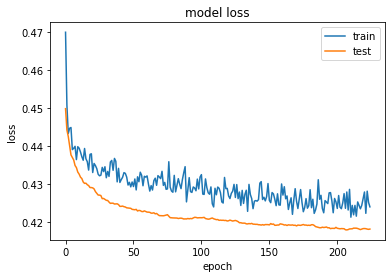

Epoch 1/225
1754/1754 [==============================] - 13s 7ms/step - loss: 0.3808 - binary_accuracy: 0.8719 - val_loss: 0.4315 - val_binary_accuracy: 0.8292
Epoch 2/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3621 - binary_accuracy: 0.8731 - val_loss: 0.4271 - val_binary_accuracy: 0.8292
Epoch 3/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3577 - binary_accuracy: 0.8730 - val_loss: 0.4249 - val_binary_accuracy: 0.8292
Epoch 4/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3576 - binary_accuracy: 0.8728 - val_loss: 0.4235 - val_binary_accuracy: 0.8292
Epoch 5/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3499 - binary_accuracy: 0.8738 - val_loss: 0.4226 - val_binary_accuracy: 0.8283
Epoch 6/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3536 - binary_accuracy: 0.8731 - val_loss: 0.4221 - val_binary_accuracy: 0.8283
Epoch 7/225
1754/1754 [======================

1754/1754 [==============================] - 7s 4ms/step - loss: 0.3372 - binary_accuracy: 0.8738 - val_loss: 0.4195 - val_binary_accuracy: 0.8226
Epoch 104/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3364 - binary_accuracy: 0.8733 - val_loss: 0.4195 - val_binary_accuracy: 0.8217
Epoch 105/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3370 - binary_accuracy: 0.8743 - val_loss: 0.4195 - val_binary_accuracy: 0.8208
Epoch 106/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3337 - binary_accuracy: 0.8749 - val_loss: 0.4196 - val_binary_accuracy: 0.8236
Epoch 107/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3334 - binary_accuracy: 0.8749 - val_loss: 0.4195 - val_binary_accuracy: 0.8226
Epoch 108/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3368 - binary_accuracy: 0.8736 - val_loss: 0.4196 - val_binary_accuracy: 0.8226
Epoch 109/225
1754/1754 [=======================

Epoch 154/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3363 - binary_accuracy: 0.8750 - val_loss: 0.4187 - val_binary_accuracy: 0.8245
Epoch 155/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3338 - binary_accuracy: 0.8749 - val_loss: 0.4187 - val_binary_accuracy: 0.8245
Epoch 156/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3358 - binary_accuracy: 0.8740 - val_loss: 0.4187 - val_binary_accuracy: 0.8245
Epoch 157/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3402 - binary_accuracy: 0.8728 - val_loss: 0.4186 - val_binary_accuracy: 0.8245
Epoch 158/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3285 - binary_accuracy: 0.8757 - val_loss: 0.4186 - val_binary_accuracy: 0.8236
Epoch 159/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3315 - binary_accuracy: 0.8750 - val_loss: 0.4186 - val_binary_accuracy: 0.8236
Epoch 160/225
1754/1754 [=========

Epoch 205/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3334 - binary_accuracy: 0.8753 - val_loss: 0.4183 - val_binary_accuracy: 0.8255
Epoch 206/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3324 - binary_accuracy: 0.8734 - val_loss: 0.4183 - val_binary_accuracy: 0.8255
Epoch 207/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3305 - binary_accuracy: 0.8733 - val_loss: 0.4183 - val_binary_accuracy: 0.8255
Epoch 208/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3304 - binary_accuracy: 0.8737 - val_loss: 0.4183 - val_binary_accuracy: 0.8255
Epoch 209/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3344 - binary_accuracy: 0.8744 - val_loss: 0.4183 - val_binary_accuracy: 0.8255
Epoch 210/225
1754/1754 [==============================] - 7s 4ms/step - loss: 0.3308 - binary_accuracy: 0.8758 - val_loss: 0.4183 - val_binary_accuracy: 0.8255
Epoch 211/225
1754/1754 [=========

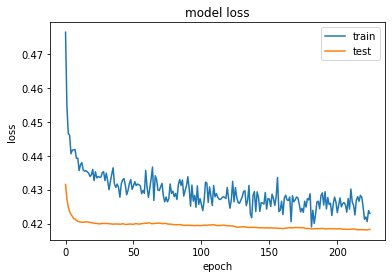

unit: 32	epoch: 225	auroc_mean: 0.718122	auroc_std: 0.013207
CPU times: user 5h 50min 1s, sys: 1h 2min 52s, total: 6h 52min 53s
Wall time: 2h 16min 3s


In [57]:
%%time
# K-Fold Cross Validation
ratio = 0.1
result = []
pdic = [(32, [225], [0.5])]
for unit, epoch_list, ratio_list in pdic:
    for epoch in epoch_list:
        for ratio in ratio_list:
            auroc_list = kfold_validation(unit, ratio, epoch, X_train_transformed, y_train, 'patient-id', verbose=1)
            result.append((unit, epoch, auroc_list))
            print("unit: %d\tepoch: %d\tauroc_mean: %f\tauroc_std: %f"  % (unit, epoch, np.mean(auroc_list), np.std(auroc_list)))

In [56]:
for unit, epoch, auroc_list in result:
    print("unit: %d\tepoch: %d\tauroc_mean: %f\tauroc_std: %f"  % (unit, epoch, np.mean(auroc_list), np.std(auroc_list)))

unit: 32	epoch: 175	auroc_mean: 0.717295	auroc_std: 0.013509


unit: 32	epoch: 150	auroc_mean: 0.716831	auroc_std: 0.013252
unit: 32	epoch: 175	auroc_mean: 0.717295	auroc_std: 0.013509
unit: 32	epoch: 200	auroc_mean: 0.717797	auroc_std: 0.013301